In [1]:
from OpInf import *
import numpy as np
import scipy
import umap
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
from itertools import product, combinations

from sklearn.manifold import SpectralEmbedding

from pathlib import Path
import json
import stiefel

import importlib
importlib.reload(stiefel)

from scipy.io import loadmat
from operators import ckron, ckron_indices

import scienceplots
plt.style.use(["science", "no-latex", "grid"])

# set numpy random seed
np.random.seed(3)


check syl solve
True
here
True
6.542978998563354e-14
Use algebraic Stiefel log, metric alpha =  -0.0
dist 3.769911184307755
NORM TEST1: 0.0
NORM TEST2: 2.847093220903485e-13
NORM TEST3: 7.02476271596808e-15


In [2]:
def initial_condition(mu, coord):
    if coord <= 0.5:
        return mu * np.sin(2 * np.pi * coord)
    
    return 0

In [3]:
from Representation import *

In [4]:
# mus = [1.1, 1.05, 1, 0.95, 0.9]
# mus = [1.15, 1.1, 1.05, 1, 0.95, 0.9, 0.85]
# mus = [0.4, 0.6, 0.8, 1.0, 1.2]
mus = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
# Load data
T_end_train = 2 
dt= 1e-3
Train_T = int(T_end_train/dt)

# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu1.15_0.85.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu04_12.npy")[:, :Train_T+1, :]
X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu0.4_0.1_1.2.npy")[:, :Train_T+1, :]
X_all_test = np.load("../examples/burgers/burgersFEniCSx_u_sol_RE1000_mu0.98.npy")[0]

In [5]:
p = 2
Mp = len(mus)
dt = 1e-3
T_end = 2

config = {
    "N": 2**7 + 1 + 1,
    "dt": 1e-3,
    "T_end": T_end,
    "mus": list(mus),
    "Mp": Mp,
    "K": T_end / dt,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQCP",
        "modeltime": "continuous",
        "dt": dt,
        "ddt_order": "4c",
        "p": p, # polynomial order
        "lambda1": 5e-2,
        "lambda2": 5e-2,
        "lambda3": 100,
    },
    "type": "single"
}




In [6]:
np.random.randint(2, 5)

4

In [7]:
mus

[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

In [8]:
mus[1:-1]

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]

In [9]:
list(combinations(mus[1:-1], 1))

[(0.5,), (0.6,), (0.7,), (0.8,), (0.9,), (1.0,), (1.1,)]

In [10]:
# # a colors list to tag the group of combinations
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Create a dictionary to store combinations with their respective colors
# tagged_combinations = {}

# for r in range(len(mus), 2, -1):
#     combinations_ = list(combinations(mus, r))
#     print(f"{len(combinations_)} of combinations generated: ", combinations_)
    
#     # Ensure that there are enough colors, cycle through colors if necessary
#     color = colors[(len(mus) - r) % len(colors)]
    
#     # Store the combinations with their tag
#     tagged_combinations[color] = combinations_
    
# # Flatten the list and maintain the color tagging
# flattened_tagged_combinations = [(item, color) for color, combos in tagged_combinations.items() for item in combos]

# # Example of accessing the flattened list with color tags
# for combo, color in flattened_tagged_combinations:
#     print(f"Combination: {combo}, Color: {color}")


# a colors list to tag the group of combinations
colors = plt.get_cmap('tab20').colors

# Create a dictionary to store combinations with their respective colors
tagged_combinations = {}

for r in range(1, len(mus) - 1):
    combinations_ = list(combinations(mus[1:-1], r))
    combinations_ = [(mus[0],) + combo + (mus[-1],) for combo in combinations_]
    print(f"{len(combinations_)} of combinations generated: ", combinations_)
    
    # Ensure that there are enough colors, cycle through colors if necessary
    color = colors[(r - 1) % len(colors)]
    
    # Store the combinations with their tag
    tagged_combinations[color] = combinations_
    
# Flatten the list and maintain the color tagging
flattened_tagged_combinations = [(item, color) for color, combos in tagged_combinations.items() for item in combos]

# Example of accessing the flattened list with color tags
for combo, color in flattened_tagged_combinations:
    print(f"Combination: {combo}, Color: {color}")

7 of combinations generated:  [(0.4, 0.5, 1.2), (0.4, 0.6, 1.2), (0.4, 0.7, 1.2), (0.4, 0.8, 1.2), (0.4, 0.9, 1.2), (0.4, 1.0, 1.2), (0.4, 1.1, 1.2)]
21 of combinations generated:  [(0.4, 0.5, 0.6, 1.2), (0.4, 0.5, 0.7, 1.2), (0.4, 0.5, 0.8, 1.2), (0.4, 0.5, 0.9, 1.2), (0.4, 0.5, 1.0, 1.2), (0.4, 0.5, 1.1, 1.2), (0.4, 0.6, 0.7, 1.2), (0.4, 0.6, 0.8, 1.2), (0.4, 0.6, 0.9, 1.2), (0.4, 0.6, 1.0, 1.2), (0.4, 0.6, 1.1, 1.2), (0.4, 0.7, 0.8, 1.2), (0.4, 0.7, 0.9, 1.2), (0.4, 0.7, 1.0, 1.2), (0.4, 0.7, 1.1, 1.2), (0.4, 0.8, 0.9, 1.2), (0.4, 0.8, 1.0, 1.2), (0.4, 0.8, 1.1, 1.2), (0.4, 0.9, 1.0, 1.2), (0.4, 0.9, 1.1, 1.2), (0.4, 1.0, 1.1, 1.2)]
35 of combinations generated:  [(0.4, 0.5, 0.6, 0.7, 1.2), (0.4, 0.5, 0.6, 0.8, 1.2), (0.4, 0.5, 0.6, 0.9, 1.2), (0.4, 0.5, 0.6, 1.0, 1.2), (0.4, 0.5, 0.6, 1.1, 1.2), (0.4, 0.5, 0.7, 0.8, 1.2), (0.4, 0.5, 0.7, 0.9, 1.2), (0.4, 0.5, 0.7, 1.0, 1.2), (0.4, 0.5, 0.7, 1.1, 1.2), (0.4, 0.5, 0.8, 0.9, 1.2), (0.4, 0.5, 0.8, 1.0, 1.2), (0.4, 0.5, 0.8, 1.1, 1.2), 

[0, 1, 8]
[0, 2, 8]
[0, 3, 8]
[0, 4, 8]
[0, 5, 8]
[0, 6, 8]
[0, 7, 8]
[0, 1, 2, 8]
[0, 1, 3, 8]
[0, 1, 4, 8]
[0, 1, 5, 8]
[0, 1, 6, 8]
[0, 1, 7, 8]
[0, 2, 3, 8]
[0, 2, 4, 8]
[0, 2, 5, 8]
[0, 2, 6, 8]
[0, 2, 7, 8]
[0, 3, 4, 8]
[0, 3, 5, 8]
[0, 3, 6, 8]
[0, 3, 7, 8]
[0, 4, 5, 8]
[0, 4, 6, 8]
[0, 4, 7, 8]
[0, 5, 6, 8]
[0, 5, 7, 8]
[0, 6, 7, 8]
[0, 1, 2, 3, 8]
[0, 1, 2, 4, 8]
[0, 1, 2, 5, 8]
[0, 1, 2, 6, 8]
[0, 1, 2, 7, 8]
[0, 1, 3, 4, 8]
[0, 1, 3, 5, 8]
[0, 1, 3, 6, 8]
[0, 1, 3, 7, 8]
[0, 1, 4, 5, 8]
[0, 1, 4, 6, 8]
[0, 1, 4, 7, 8]
[0, 1, 5, 6, 8]
[0, 1, 5, 7, 8]
[0, 1, 6, 7, 8]
[0, 2, 3, 4, 8]
[0, 2, 3, 5, 8]
[0, 2, 3, 6, 8]
[0, 2, 3, 7, 8]
[0, 2, 4, 5, 8]
[0, 2, 4, 6, 8]
[0, 2, 4, 7, 8]
[0, 2, 5, 6, 8]
[0, 2, 5, 7, 8]
[0, 2, 6, 7, 8]
[0, 3, 4, 5, 8]
[0, 3, 4, 6, 8]
[0, 3, 4, 7, 8]
[0, 3, 5, 6, 8]
[0, 3, 5, 7, 8]
[0, 3, 6, 7, 8]
[0, 4, 5, 6, 8]
[0, 4, 5, 7, 8]
[0, 4, 6, 7, 8]
[0, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 8]
[0, 1, 2, 3, 5, 8]
[0, 1, 2, 3, 6, 8]
[0, 1, 2, 3, 7, 8]
[0, 1, 2, 4, 5, 8]
[0

S =  [120.15339837  89.44667314  71.11901381  47.19534758  34.40994546]
idx =  7
rel_err_SVD[idx] =  0.038607863736440096
X =  (130, 6003)
X_ref =  (130, 1)
S =  [124.41565194  89.55919893  72.38888752  48.32916958  35.23343136]
idx =  8
rel_err_SVD[idx] =  0.03346648616019554
X =  (130, 6003)
X_ref =  (130, 1)
S =  [129.19130988  91.61237863  73.87691259  49.73103582  36.07634414]
idx =  8
rel_err_SVD[idx] =  0.033681590461937416
X =  (130, 6003)
X_ref =  (130, 1)
S =  [133.83683184  94.98063666  75.50694158  51.035837    36.91229541]
idx =  8
rel_err_SVD[idx] =  0.03365772448952775
X =  (130, 6003)
X_ref =  (130, 1)
S =  [138.31327422  99.22703234  77.40275582  52.28830546  37.75509267]
idx =  8
rel_err_SVD[idx] =  0.03348932487247391
X =  (130, 6003)
X_ref =  (130, 1)
S =  [142.62075514 104.13063269  79.4946543   53.51279286  38.60657912]
idx =  7
rel_err_SVD[idx] =  0.04005122417970042
X =  (130, 8004)
X_ref =  (130, 1)
S =  [127.80383028  92.5816305   76.86265529  51.29432495  37.

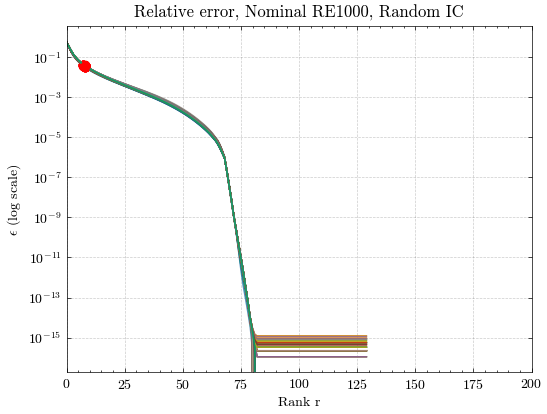

In [11]:
X_nominal = np.concatenate([X for X in X_all_nominal], axis=0).T

# randomly draw 3 ICs (mus) without replacement from X_all_nominal
# X_all_nominals_lst = [X_all_nominal, X_all_nominal_2]
X_list = []
drawn_mus = [tup[0] for tup in flattened_tagged_combinations]
color_tags = []
for n_X in range(len(flattened_tagged_combinations)):
    mus_idx = [mus.index(mus_) for mus_ in flattened_tagged_combinations[n_X][0]]
    print(mus_idx)
    color_tags.append(flattened_tagged_combinations[n_X][1])
    X_list.append(np.concatenate([X_all_nominal[i] for i in mus_idx], axis=0).T)

X_list.append(X_nominal)
color_tags.append((0,1,1)) # cyan

rob_lst = []
rel_err_SVD_lst = []
idx_lst = []
# names = [f"tap={taps}" for taps in numtaps] + ["Nominal"]
names = [f"mu={mus}" for mus in drawn_mus] + ["Nominal"]

fig, ax = plt.subplots(figsize=(6, 4.5))

err_tol = 5e-2

# mus = [0.01] # only one mu for now

for i in range(len(X_list)):
    
    X = X_list[i]
    
    # X_ref is the reference state which is just defined as the mean of the snapshots 
    X_ref = np.mean(X, axis=1)[:, None]
    
    print("X = ", X.shape)
    print("X_ref = ", X_ref.shape)
    
    # svd
    U, S, V = np.linalg.svd((X - X_ref), full_matrices=False)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (len(S) - 1))
    # print("eigvals_SVD = \n", eigvals_SVD[:5])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD < err_tol)[0][0] + 1
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.plot(idx, rel_err_SVD[idx], 'ro', label=f"{err_tol:.2e} at r={idx}, {names[i]}")
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.set_title("Relative error, Nominal RE1000, Random IC")
    # ax.legend()

In [12]:
# Model parameters
# r = np.max(idx_lst)
r = idx_lst[-1]
# q_trunc = 2
q_trunc = 2
# p = 3

tol = 1e-3      # tolerence for alternating minimization
gamma = 0.01       # regularization parameter
max_iter = 100  # maximum number of iterations

Vr_lst = []
Vbar_lst = []
Shat_lst = []
Xi_lst = []
Poly_lst = []

for i in range(len(X_list)):
    # Procustes problem for each mu
    X = X_list[i]
    num_snapshots = X.shape[1]
    print("num_snapshots: ", num_snapshots)
    print("X = ", X.shape)
    X_ref = np.mean(X, axis=1)[:, None]
    # X_ref = np.zeros((X.shape[0]))[:, None]
    X_centered = X - X_ref

    U, S, Vr = np.linalg.svd(X_centered, full_matrices=False)
    
    Vr = U[:, :r]
    Vbar = U[:, r:r + q_trunc]
    q = Vr.T @ X_centered
    Proj_error = X_centered - (Vr @ q)
    Poly = np.concatenate(polynomial_form(q, p), axis=0)
    Xi = Vbar.T @ Proj_error @ Poly.T @ np.linalg.inv(Poly @ Poly.T + gamma * np.identity((p - 1)*r))
    
    energy = np.linalg.norm(Vr @ q + (Vbar @ Xi @ Poly), 'fro')**2 / np.linalg.norm(X - X_ref, 'fro')**2
    
    print(f"Snapshot energy: {energy:e}")

    Gamma_MPOD = X_ref + (Vr @ q) + (Vbar @ Xi @ Poly)
    print(f"\nReconstruction error: {relative_error(X, Gamma_MPOD, X_ref):.4%}")
    
    Vr_lst.append(Vr)
    Vbar_lst.append(Vbar)
    Shat_lst.append(q)
    Xi_lst.append(Xi)
    Poly_lst.append(Poly)

    # q, energy, Xi, Vr, Vbar, Poly = alternating_minimization(X, X_ref, num_snapshots, max_iter, 1e-3, gamma, r, q, p, initial_Shat=None)

    # print("q = ", q.shape)
    # print("qbar = ", qbar.shape)

num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.689187e-01

Reconstruction error: 17.6296%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.672926e-01

Reconstruction error: 18.0850%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.654044e-01

Reconstruction error: 18.5997%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.651562e-01

Reconstruction error: 18.6663%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.652371e-01

Reconstruction error: 18.6446%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.655074e-01

Reconstruction error: 18.5720%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.658628e-01

Reconstruction error: 18.4761%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.672188e-01

Reconstruction error: 18.1054%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.656968e-01

Reconstruction error: 18.5209%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.658083e-01

Reconstruction error: 18.4908%


Snapshot energy: 9.633076e-01

Reconstruction error: 19.1551%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.637321e-01

Reconstruction error: 19.0440%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.642248e-01

Reconstruction error: 18.9142%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.630311e-01

Reconstruction error: 19.2271%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.633748e-01

Reconstruction error: 19.1376%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.638018e-01

Reconstruction error: 19.0257%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.633529e-01

Reconstruction error: 19.1433%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.637034e-01

Reconstruction error: 19.0515%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.638119e-01

Reconstruction error: 19.0231%
num_snapshots:  10005
X =  (130, 10005)
Snapshot energy: 9.646381e-01

Reconstruction error: 18.8046%
num_snapshots:  10005
X =  (130, 100

In [13]:
# Aligning the signs of Vr_lst with Vr_lst[-1]
Vr1 = Vr_lst[-1]
for idx in range(len(Vr_lst) - 1):
    Vr_idx = Vr_lst[idx]
    for j in range(Vr_idx.shape[1]):
        dist1 = np.linalg.norm(Vr1[:, j] - Vr_idx[:, j])
        dist2 = np.linalg.norm(Vr1[:, j] + Vr_idx[:, j])
        if dist2 < dist1:
            Vr_lst[idx][:, j] = -Vr_lst[idx][:, j]

# for i in range(len(Vr_lst) - 1):
#     max_inds = np.argmax(Vr_lst[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
#     for j in range(Vr_lst[i].shape[1]):
#         if np.sign(Vr_lst[i][max_inds[j], j]) != np.sign(Vr_lst[-1][max_inds[j], j]):
#             Vr_lst[i][:, j] = -Vr_lst[i][:, j]

# For Vbar_lst, ensuring sign agreement with Vbar_lst[-1]
Vbar1 = Vbar_lst[-1]
for idx in range(len(Vbar_lst) - 1):
    Vbar_idx = Vbar_lst[idx]
    for j in range(Vbar_idx.shape[1]):
        dist1 = np.linalg.norm(Vbar1[:, j] - Vbar_idx[:, j])
        dist2 = np.linalg.norm(Vbar1[:, j] + Vbar_idx[:, j])
        if dist2 < dist1:
            Vbar_lst[idx][:, j] = -Vbar_lst[idx][:, j]   

In [14]:
V_combined_lst = [np.concatenate([Vr, Vbar], axis=1) for Vr, Vbar in zip(Vr_lst, Vbar_lst)]

# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst], axis=1)
flat_V_combined_arr = np.concatenate([rob.flatten()[:, None] for rob in V_combined_lst], axis=1)

# colors = 
colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst)))


# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(flat_Vr_arr.T)
embedding_Vbar = embedder.fit_transform(flat_Vbar_arr.T)

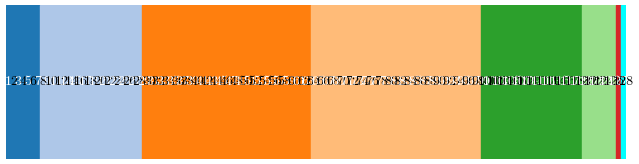

In [15]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size as needed

# Loop through the colors and plot each one as a rectangle
for i, color in enumerate(color_tags):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, 0.5, str(i + 1), color='white' if i % 2 == 0 else 'black',
            horizontalalignment='center', verticalalignment='center')

# Set limits and remove axes for better visualization
ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()

In [16]:
# reducer = umap.UMAP(n_components=2, random_state=42, set_op_mix_ratio=0.25)
# embedding = reducer.fit_transform(flat_V_combined_arr.T)
embedding = embedder.fit_transform(flat_V_combined_arr.T)
color_tags = np.array(color_tags)

# Outlier Detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(embedding)
iso_labels = iso_forest.predict(embedding)
iso_scores = iso_forest.decision_function(embedding)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(embedding)
lof_scores = lof.negative_outlier_factor_

oc_svm = OneClassSVM(nu=0.1)
oc_svm.fit(embedding)
svm_labels = oc_svm.predict(embedding)
svm_scores = oc_svm.decision_function(embedding)

# Clustering
n_clusters = 3  # Number of clusters to ensure distinct outliers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)

# Find most anomalous point in each cluster
def get_distinct_outliers(scores, cluster_labels, n_clusters):
    distinct_outliers = []
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            cluster_scores = scores[cluster_indices]
            most_anomalous_index = cluster_indices[np.argmin(cluster_scores)]
            distinct_outliers.append(most_anomalous_index)
    return distinct_outliers

anomalous_idx_iso = get_distinct_outliers(iso_scores, cluster_labels, n_clusters)
anomalous_idx_lof = get_distinct_outliers(lof_scores, cluster_labels, n_clusters)
anomalous_idx_svm = get_distinct_outliers(svm_scores, cluster_labels, n_clusters)

# # Plotting
# def plot_embedding(embedding, labels, anomalous_idx, title):
#     inliers_idx = np.where(labels == 1)[0]
#     outliers_idx = np.where(labels == -1)[0]
#     inliers = embedding[inliers_idx]
#     outliers = embedding[outliers_idx]
    
#     fig, ax = plt.subplots(figsize=(8, 6))
#     ax.scatter(inliers[:, 0], inliers[:, 1], c=color_tags[inliers_idx], s=10, label='Inliers', marker='o')
#     ax.scatter(outliers[:, 0], outliers[:, 1], c=color_tags[outliers_idx], s=30, label='Outliers', marker='x')
#     ax.scatter(embedding[anomalous_idx, 0], embedding[anomalous_idx, 1], c=color_tags[anomalous_idx], s=60, label='Distinct Anomalous', marker='v')
#     ax.set_title(title)
#     ax.set_xlabel('UMAP 1')
#     ax.set_ylabel('UMAP 2')
#     ax.legend()
    
#     # Create colorbar
#     unique_color_tags = []
#     unique_color_tags.append(color_tags[0])
#     for i in range(1, len(color_tags)):
#         is_unique = True
#         for j in range(len(unique_color_tags)):
#             if np.array_equal(color_tags[i], unique_color_tags[j]):
#                 is_unique = False
#                 break
#         if is_unique:
#             unique_color_tags.append(color_tags[i])
            
#     number_of_colors = len(unique_color_tags)
#     norm = Normalize(vmin=0, vmax=number_of_colors-1)
#     sm = ScalarMappable(norm=norm, cmap=ListedColormap(unique_color_tags))
#     sm.set_array([])
    
#     cbar = plt.colorbar(sm, ticks=np.arange(number_of_colors), boundaries=np.arange(-0.5, number_of_colors+0.5, 1), ax=ax)
#     cbar.set_label('Color Tags')
#     cbar.set_ticks(np.arange(number_of_colors))
    
#     # Cbar labels is len(mus) - 2 (excluding the first and last mus) choose r-1
#     combo_names = [f"{len(mus) - 2} choose {number}" for number in range(1, len(mus) - 1)]
#     cbar.set_ticklabels([f'{comboname}' for comboname in combo_names] + ['Full'])
    
#     # cbar.set_ticklabels([f'Group {i+1}' for i in range(number_of_colors)])

#     plt.show()

# # Isolation Forest
# plot_embedding(embedding, iso_labels, anomalous_idx_iso, 'Isolation Forest Outlier Detection')

# # Local Outlier Factor
# plot_embedding(embedding, lof_labels, anomalous_idx_lof, 'Local Outlier Factor Outlier Detection')

# # One-Class SVM
# plot_embedding(embedding, svm_labels, anomalous_idx_svm, 'One-Class SVM Outlier Detection')

In [17]:
import importlib
import OpInf
# import reloading
# reload the whole OpInf module
importlib.reload(OpInf)
from OpInf import *


config['robparams'] = {
    "r": int(r)
}

operators_lst = []

# use each mu in between the min and max mu
for i in range(len(X_list) - 1):
    # X = X_list[i]
    # num_snapshots = X.shape[1]
    # print("num_snapshots: ", num_snapshots)
    # print("X = ", X.shape)
    
    mu_test = mus[2]
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    X_centered = X - X_ref

    # U, S, Vr = np.linalg.svd(X_centered, full_matrices=False)
    
    Vr = Vr_lst[i]
    Vbar = Vbar_lst[i]
    q = Vr.T @ X_centered

    Mp = len(drawn_mus[i])
    print("Mp: ", Mp)
    
    Nsnapshots = X.shape[1]
    print("Nsnapshots: ", Nsnapshots)
    
    dShatdt = []
    Shat_lst = []
    dSdt = []
    for j in range(Mp):
        start_ind = int((j) * Nsnapshots/Mp)
        end_ind = int((j+1) * Nsnapshots/Mp)
        print("start_ind: ", start_ind)
        print("end_ind: ", end_ind)
        ddtshat, ind = ddt(q[:, start_ind:end_ind], dt=dt, scheme='4c')
        ddts, ind = ddt(X[:, start_ind:end_ind], dt=dt, scheme="4c")
        dShatdt.append(ddtshat)
        ind = np.array(ind) + int((j) * Nsnapshots/Mp)
        Shat_lst.append(q[:, ind])
        dSdt.append(ddts)

    # update config file with truncation order r
    config['robparams'] = {
        "r": int(r)
    }

    Shat_py = np.concatenate(Shat_lst, axis=1)
    dShatdt_py = np.concatenate(dShatdt, axis=1).T
    dSdt_py = np.hstack(dSdt)

    print("Shape of Shat_py: ", Shat_py.shape)
    print("Shape of dShatdt_py: ", dShatdt_py.shape)


    N = int(config['N'])
    dt = config['dt']
    T_end = config['T_end']
    K = int(config['K'])
    DS = config['DS']
    params = config['params']  # This will be a dictionary in Python
    robparams = config['robparams']  # This will be a dictionary in Python


    coord = np.linspace(0, 1, N)
    print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    time_domain = np.arange(0, T_end, dt)
    train_size = Shat_py.shape[1] // len(mus)
    
    print("Train size: ", train_size)

    Shat_true = Shat_lst[2]
    # regs_product = [1e-3, 1e1, 3, 1e1, 1e4, 10, 1e1, 1e7, 7]

    # regs_product = [10, 10, 1, 43.939705607607905, 43.939705607607905, 1, 27.825594022071257, 27.825594022071257, 1] # for r=5
    # regs_product = [1e-1, 1e-1, 1, 1, 1000, 5, 1000, 100000, 3]
    # regs_product = [1e-1, 1e-1, 1, 300, 300, 1, 100000, 100000, 1] # r =8, 5e-2
    regs_product = [1e-1, 1e-1, 1, 4000, 4000, 1, 1000000, 1000000, 1] # r =5, 1e-1
    # regs_product = [1e-1, 1e-1, 1, 1e-1, 1e-1, 1, 10000, 10000, 1]
    # regs_product = [10, 10, 1, 129.1549665014884, 129.1549665014884, 1, 1000000, 1000000, 1] # for r=12

    regs, errors = train_gridsearch(Shat_py, dShatdt_py, Shat_true, train_size, r, regs_product, time_domain, q0, params, testsize=None, margin=1.1)
    
    print(f"Regularization params: {regs}, \t Error: {errors}")
    
    params['lambda1'] = regs[0]
    params['lambda2'] = regs[1]
    if len(regs) > 2:
        params['lambda3'] = regs[2]

    operators = infer_operators_nl(Shat_py, None, config['params'], dShatdt_py)
    
    operators_lst.append(operators)


Mp:  3
Nsnapshots:  6003
start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
Shape of Shat_py:  (8, 5991)
Shape of dShatdt_py:  (5991, 8)
coord =  (130,)
Train size:  665
Constructing least-squares solver, r=8
TRAINING 1 ROMS
(1/1) Testing ROM with (0.09999999999999999, 4000.0000000000014, 1000000.0)
Generating ghat ...


drp:  100
Obtained data matrix...
Regularization parameters:  0.09999999999999999 4000.0000000000014 1000000.0
Solving...
Solved!
Integrating...
Bound check passed
Regularization params: [0.09999999999999999, 4000.0000000000014, 1000000.0], 	 Error: 0.9097988405463997
Generating ghat ...
drp:  100
Obtained data matrix...
Regularization parameters:  0.09999999999999999 4000.0000000000014 1000000.0
Solving...
Solved!
Mp:  3
Nsnapshots:  6003
start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
Shape of Shat_py:  (8, 5991)
Shape of dShatdt_py:  (5991, 8)
coord =  (130,)
Train size:  665
Constructing least-squares solver, r=8
TRAINING 1 ROMS
(1/1) Testing ROM with (0.09999999999999999, 4000.0000000000014, 1000000.0)
Generating ghat ...
drp:  100
Obtained data matrix...
Regularization parameters:  0.09999999999999999 4000.0000000000014 1000000.0
Solving...
Solved!
Integrating...
Bound check passed
Regularization params: [0.09999999999999999, 4000.0000

In [18]:
T_end_index = int(T_end/dt)

# Analyze difference in operators

In [19]:
operators_lst[0].keys()

dict_keys(['A', 'F', 'N', 'B', 'C', 'P'])

In [20]:
# for each operator compute pairwise difference in terms of Frobenius Norm, Spectral Norm, and Eigenvalue distances

operatorsA = []
operatorsF = []
operatorsC = []
operatorsP = []

# Extract matrices from the dictionaries
for dictionary in operators_lst:
    operatorsA.append(dictionary['A'])
    operatorsF.append(dictionary['F'])
    operatorsC.append(dictionary['C'])
    operatorsP.append(dictionary['P'])


# Function to compute the normalized Frobenius norm difference between two matrices
def normalized_frobenius_norm_difference(matrix_a, matrix_b):
    norm_a = np.linalg.norm(matrix_a, 'fro')
    norm_b = np.linalg.norm(matrix_b, 'fro')
    diff_norm = np.linalg.norm(matrix_a - matrix_b, 'fro')
    return diff_norm / max(norm_a, norm_b)

# Function to compute the normalized Spectral norm difference between two matrices
def normalized_spectral_norm_difference(matrix_a, matrix_b):
    norm_a = np.linalg.norm(matrix_a)
    norm_b = np.linalg.norm(matrix_b)
    diff_norm = np.linalg.norm(matrix_a - matrix_b)
    return diff_norm / max(norm_a, norm_b)


def pairwise_mat_distances(matrices, norm_function):
    num_matrices = len(matrices)
    
    # Initialize a 2D array with zeros
    pair_dist = np.zeros((num_matrices, num_matrices))
    
    for i in range(num_matrices):
        for j in range(i+1, num_matrices):
            matrix_a = matrices[i]
            matrix_b = matrices[j]
            norm_diff = norm_function(matrix_a, matrix_b)
            # Store the norm difference in the pair_dist array
            pair_dist[i][j] = norm_diff
            pair_dist[j][i] = norm_diff  # Since distance is symmetric

    return pair_dist

# Calculate pairwise distances for each type of operator and each norm
operatorsA_frobenius = pairwise_mat_distances(operatorsA, normalized_frobenius_norm_difference)
operatorsF_frobenius = pairwise_mat_distances(operatorsF, normalized_frobenius_norm_difference)
operatorsC_frobenius = pairwise_mat_distances(operatorsC, normalized_frobenius_norm_difference)
operatorsP_frobenius = pairwise_mat_distances(operatorsP, normalized_frobenius_norm_difference)

operatorsA_spectral = pairwise_mat_distances(operatorsA, normalized_spectral_norm_difference)
operatorsF_spectral = pairwise_mat_distances(operatorsF, normalized_spectral_norm_difference)
operatorsC_spectral = pairwise_mat_distances(operatorsC, normalized_spectral_norm_difference)
operatorsP_spectral = pairwise_mat_distances(operatorsP, normalized_spectral_norm_difference)

# Print or process the resulting distance matrices as needed
print("Pairwise Frobenius distances (A):")
print(operatorsA_frobenius)

print("Pairwise Spectral distances (A):")
print(operatorsA_spectral)

# Repeat for F, C, and P as needed


Pairwise Frobenius distances (A):
[[0.         0.07362499 0.09998505 ... 0.22072851 0.2447927  0.22664562]
 [0.07362499 0.         0.05471577 ... 0.1928205  0.21684594 0.19769881]
 [0.09998505 0.05471577 0.         ... 0.16379392 0.18860167 0.17497587]
 ...
 [0.22072851 0.1928205  0.16379392 ... 0.         0.03502934 0.0393478 ]
 [0.2447927  0.21684594 0.18860167 ... 0.03502934 0.         0.05216181]
 [0.22664562 0.19769881 0.17497587 ... 0.0393478  0.05216181 0.        ]]
Pairwise Spectral distances (A):
[[0.         0.07362499 0.09998505 ... 0.22072851 0.2447927  0.22664562]
 [0.07362499 0.         0.05471577 ... 0.1928205  0.21684594 0.19769881]
 [0.09998505 0.05471577 0.         ... 0.16379392 0.18860167 0.17497587]
 ...
 [0.22072851 0.1928205  0.16379392 ... 0.         0.03502934 0.0393478 ]
 [0.2447927  0.21684594 0.18860167 ... 0.03502934 0.         0.05216181]
 [0.22664562 0.19769881 0.17497587 ... 0.0393478  0.05216181 0.        ]]


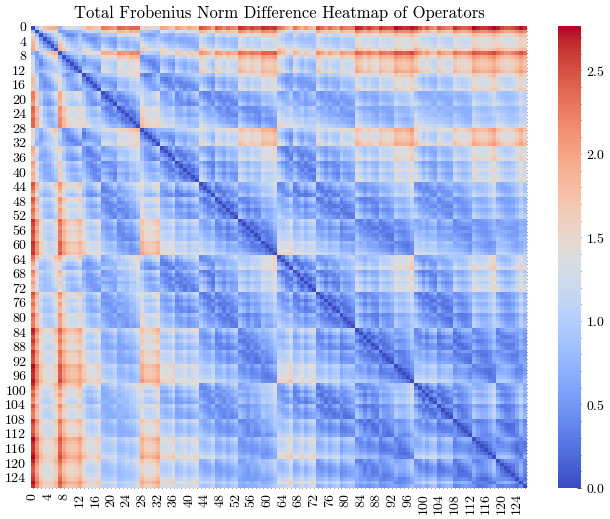

In [21]:
# calculate total frobenius norm of operators
operators_total_frobenius = operatorsA_frobenius + operatorsF_frobenius + operatorsC_frobenius + operatorsP_frobenius

# Create a heatmap to visualize the distance matrix
num_matrices = len(operatorsA)
plt.figure(figsize=(8, 6))
# sns.heatmap(operatorsA_frobenius, annot=True, cmap='coolwarm', xticklabels=[f'Matrix {i+1}' for i in range(num_matrices)], yticklabels=[f'Matrix {i+1}' for i in range(num_matrices)])
sns.heatmap(operators_total_frobenius, cmap='coolwarm')
plt.title('Total Frobenius Norm Difference Heatmap of Operators')
plt.show()

In [94]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist, squareform

# # Apply hierarchical clustering
# Z = linkage(operators_total_frobenius, 'average')

# # Form clusters (here we specify 3 clusters)
# max_clusters = 3
# clusters = fcluster(Z, max_clusters, criterion='maxclust')

# # Convert the distance matrix to a condensed form
# condensed_distances = squareform(operators_total_frobenius)

# # check if condensed_distances is condensed
# assert len(condensed_distances) == len(operators_total_frobenius) * (len(operators_total_frobenius) - 1) // 2

# # Apply hierarchical clustering
# Z = linkage(condensed_distances, 'average')

# # Form clusters (specify 3 clusters)
# max_clusters = 3
# clusters = fcluster(Z, max_clusters, criterion='maxclust')

# # Plot the dendrogram
# plt.figure(figsize=(10, 7))
# plt.title("Dendrogram")
# plt.xlabel("Index")
# plt.ylabel("Distance")
# dendrogram(Z)
# plt.show()

# # Select one representative from each cluster
# representatives = []
# for cluster_id in range(1, max_clusters + 1):
#     cluster_indices = np.where(clusters == cluster_id)[0]
#     # Select the first operator from each cluster as a representative
#     representative_index = cluster_indices[0]
#     representatives.append(representative_index)

# print(f"The top 3 most distinct operators are at indices: {representatives}")


# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# from scipy.spatial.distance import pdist, squareform

# # # Generate pairwise distance matrix (assuming operators_total_frobenius is your data)
# # distances = pdist(operators_total_frobenius, metric='euclidean')

# # Apply hierarchical clustering
# # Z = linkage(distances, 'average')
# Z = linkage(operators_total_frobenius, 'average')

# # # Form clusters (specify 3 clusters)
# max_clusters = 3
# clusters = fcluster(Z, max_clusters, criterion='maxclust')

# # Plot the dendrogram
# plt.figure(figsize=(10, 7))
# plt.title("Dendrogram")
# plt.xlabel("Index")
# plt.ylabel("Distance")
# dendrogram(Z)
# plt.show()

# # Find the cluster centroids
# representatives = []
# for cluster_id in range(1, max_clusters + 1):
#     cluster_indices = np.where(clusters == cluster_id)[0]
#     cluster_distances = operators_total_frobenius[np.ix_(cluster_indices, cluster_indices)]
#     print(cluster_distances.shape)
#     centroid_index = np.argmin(cluster_distances.sum(axis=0))
#     representative_index = cluster_indices[centroid_index]
#     representatives.append(representative_index)

# print(f"The top {max_clusters} most distinct operators are at indices: {representatives}")


# # find the indices of the 3 operators with the least total frobenius norm
# representatives = np.argsort(operators_total_frobenius.sum(axis=1))[:3]

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

best_score = -1
best_threshold = None

thresholds = np.linspace(0, 1, 100)

Z = linkage(operators_total_frobenius, 'average')

for t in thresholds:
    clusters = fcluster(Z, t, criterion='distance')
    if len(np.unique(clusters)) > 1 and len(np.unique(clusters)) < len(operators_total_frobenius):
        score = silhouette_score(operators_total_frobenius, clusters, metric='precomputed')
        if score > best_score:
            print(f"Threshold: {t}, Silhouette Score: {score}")
            best_score = score
            best_threshold = t

threshold = best_threshold
print(f"Best distance threshold based on silhouette score: {threshold}")


clusterer = AgglomerativeClustering(n_clusters=2, metric="precomputed", linkage="average", distance_threshold=None)
clusters = clusterer.fit_predict(operators_total_frobenius)
print(clusters)

Threshold: 0.5252525252525253, Silhouette Score: 0.005374921757759394
Threshold: 0.595959595959596, Silhouette Score: 0.00792994915728459
Threshold: 0.6262626262626263, Silhouette Score: 0.008884646036229921
Threshold: 0.6363636363636365, Silhouette Score: 0.011901032283331515
Threshold: 0.6565656565656566, Silhouette Score: 0.016727231836618266
Threshold: 0.7070707070707072, Silhouette Score: 0.021012691086447086
Threshold: 0.7474747474747475, Silhouette Score: 0.02689941361656351
Threshold: 0.7575757575757577, Silhouette Score: 0.03097854439796647
Threshold: 0.888888888888889, Silhouette Score: 0.033407581481883594
Threshold: 0.8989898989898991, Silhouette Score: 0.037989939970159925
Threshold: 0.9090909090909092, Silhouette Score: 0.038892297604036695
Threshold: 0.9191919191919192, Silhouette Score: 0.040470249017315815
Threshold: 0.9292929292929294, Silhouette Score: 0.048837733371111136
Threshold: 0.9595959595959597, Silhouette Score: 0.05600890293666215
Threshold: 1.0, Silhouette

/tmp/ipykernel_252169/791497818.py:91: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(operators_total_frobenius, 'average')


<Figure size 800x600 with 0 Axes>

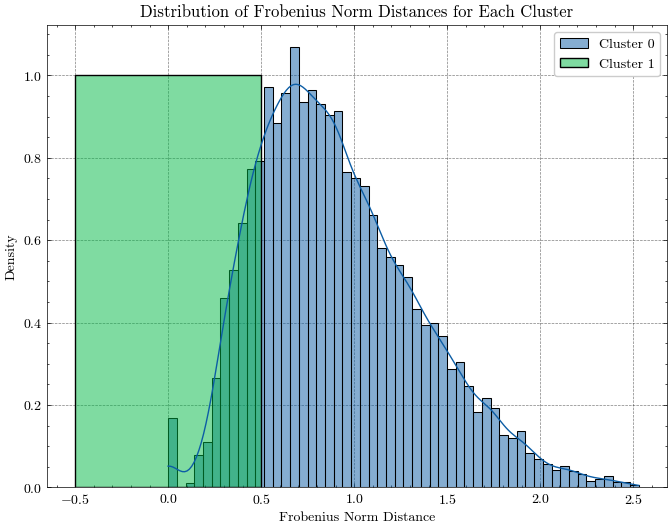

In [91]:
# plot distribution of distances for each cluster
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(max(clusters) + 1):
    cluster_indices = np.where(clusters == i)[0]
    cluster_distances = operators_total_frobenius[np.ix_(cluster_indices, cluster_indices)]
    sns.histplot(cluster_distances.flatten(), ax=ax, label=f"Cluster {i}", stat='density', kde=True)

ax.set_title("Distribution of Frobenius Norm Distances for Each Cluster")
ax.set_xlabel("Frobenius Norm Distance")
ax.set_ylabel("Density")
ax.legend()

In [107]:
cluster_distances.sum(axis=0)

75

In [109]:
# find 3 cluster representatives from the similar cluster (cluster 0)
representatives = []
cluster_indices = np.where(clusters == 0)[0]
cluster_distances = operators_total_frobenius[np.ix_(cluster_indices, cluster_indices)]
print(cluster_distances.shape)
representatives = np.argsort(operators_total_frobenius.sum(axis=1))[:3]

print(f"The top 3 most distinct operators are at indices: {representatives}")

(126, 126)
The top 3 most distinct operators are at indices: [76 49 48]


In [110]:
# compute the pairwise distances between the 3 operators with the least total frobenius norm
pairwise_mat_distances([operatorsA[i] for i in representatives], normalized_frobenius_norm_difference)

array([[0.        , 0.05301425, 0.03572126],
       [0.05301425, 0.        , 0.03063577],
       [0.03572126, 0.03063577, 0.        ]])

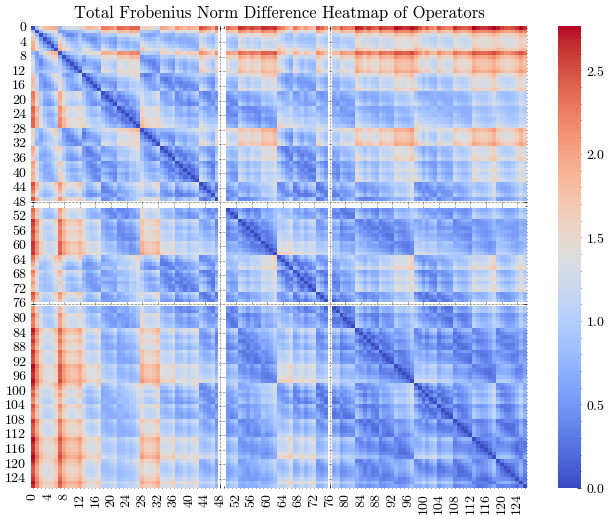

In [111]:
# Initialize a mask of the same shape as your data with all False values
mask = np.zeros_like(operators_total_frobenius, dtype=bool)

# Set the values at the indices specified in `representatives` to True
for idx in representatives:
    mask[idx, :] = True
    mask[:, idx] = True

# Use this mask in the `sns.heatmap` function to highlight the cells
plt.figure(figsize=(8, 6))
sns.heatmap(operators_total_frobenius, cmap='coolwarm', mask=mask)
plt.title('Total Frobenius Norm Difference Heatmap of Operators')
plt.show()

# get distinct operators and evaluate

In [112]:
import tqdm

abs_error_full_lst_operators = []
relative_error_testing_window_lst_operators = []
relative_error_training_window_lst_operators = []
s_rec_full_lst_operators = []

mu_test = 0.98

for i in tqdm.tqdm(range(len(X_list)-1)):
    
    operators = operators_lst[i]
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    # X_centered = X - X_ref
    
    Vr = Vr_lst[i]
    Vbar = Vbar_lst[i]
    
    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    # Xi = Xi_lst[-1] # the nominal Xi
    Xi = Xi_lst[i]
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr @ s_hat_full + Vbar @ Xi @ poly_full
    
    
    abs_error_full = np.abs(X_all_test.T - s_rec_full)
    relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
    relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
    
    abs_error_full_lst_operators.append(abs_error_full)
    relative_error_testing_window_lst_operators.append(relative_error_testing_window)
    relative_error_training_window_lst_operators.append(relative_error_training_window)
    s_rec_full_lst_operators.append(s_rec_full)
    
    

100%|██████████| 127/127 [00:02<00:00, 51.49it/s]


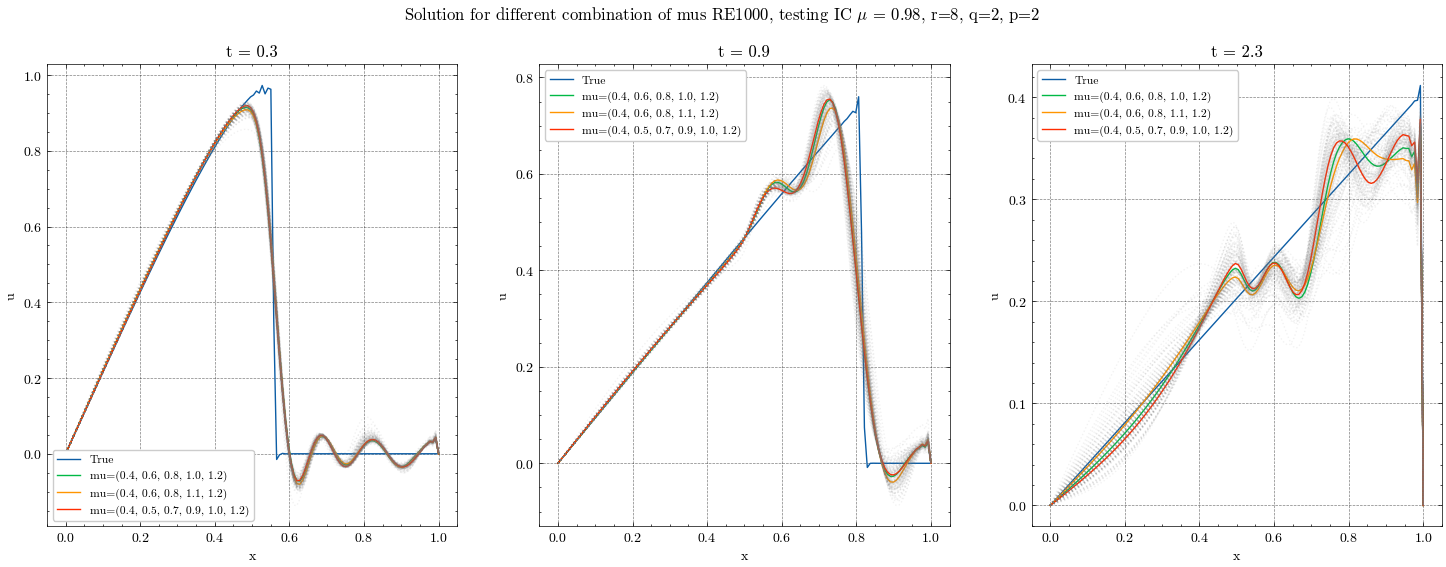

In [113]:
times = [0.3, 0.9, 2.3]

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

colors = plt.cm.tab20(np.linspace(0, 1, len(X_list)))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, s_rec_full_lst_operators[0].shape[0])
    
    ax.plot(x_values, X_all_test.T[:, t_index], label="True", linestyle='-', alpha=1)
    for j in range(len(X_list)-1):
        ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], linestyle=':', alpha=0.1, color='grey')
        
        if j in representatives:
            ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], label=names[j], linestyle='-', alpha=1)
            
        # if j in anomalous_idx_iso:
        #     ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], label=names[j], linestyle='--', alpha=1, color=colors[j])
    
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="best", fontsize='small')
    
plt.suptitle(f"Solution for different combination of mus RE1000, testing IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
plt.show()


In [32]:
# choose the distinct operators from clustering
V_combined_lst_stochastic = []
Vr_lst_sel = []
Vbar_lst_sel = []

for i in representatives:
    assert(np.allclose(V_combined_lst[i][:, :r], Vr_lst[i]))
    assert(np.allclose(V_combined_lst[i][:, r:], Vbar_lst[i]))
    V_combined_lst_stochastic.append(V_combined_lst[i])
    Vr_lst_sel.append(Vr_lst[i])
    Vbar_lst_sel.append(Vbar_lst[i])    

X_all_global = np.concatenate([X_list[i] for i in representatives], axis=1)
X_all_global = X_all_global - np.mean(X_all_global, axis=1)[:, None]
V_combined_global = np.linalg.svd(X_all_global, full_matrices=False)[0][:, :r+q_trunc]
V_combined_lst_stochastic.append(V_combined_global)
Vr_lst_sel.append(V_combined_global[:, :r])
Vbar_lst_sel.append(V_combined_global[:, r:])

In [33]:
# now align the signs of Vr_lst_sel with Vr_lst_sel[-1]
Vr1 = Vr_lst_sel[-1]

for idx in range(len(Vr_lst_sel) - 1):
    Vr_idx = Vr_lst_sel[idx]
    for j in range(Vr_idx.shape[1]):
        dist1 = np.linalg.norm(Vr1[:, j] - Vr_idx[:, j])
        dist2 = np.linalg.norm(Vr1[:, j] + Vr_idx[:, j])
        if dist2 < dist1:
            Vr_lst_sel[idx][:, j] = -Vr_lst_sel[idx][:, j]

# Aligning the signs of Vr_lst_sel with Vr_lst_sel[-1]
Vbar1 = Vbar_lst_sel[-1]

for idx in range(len(Vbar_lst_sel) - 1):
    Vbar_idx = Vbar_lst_sel[idx]
    for j in range(Vbar_idx.shape[1]):
        dist1 = np.linalg.norm(Vbar1[:, j] - Vbar_idx[:, j])
        dist2 = np.linalg.norm(Vbar1[:, j] + Vbar_idx[:, j])
        if dist2 < dist1:
            Vbar_lst_sel[idx][:, j] = -Vbar_lst_sel[idx][:, j]

# Aligning signs for V_combined_lst_stochastic
V_combined1 = V_combined_lst_stochastic[-1]

for idx in range(len(V_combined_lst_stochastic) - 1):
    V_combined_idx = V_combined_lst_stochastic[idx]
    for j in range(V_combined_idx.shape[1]):
        dist1 = np.linalg.norm(V_combined1[:, j] - V_combined_idx[:, j])
        dist2 = np.linalg.norm(V_combined1[:, j] + V_combined_idx[:, j])
        if dist2 < dist1:
            V_combined_lst_stochastic[idx][:, j] = -V_combined_lst_stochastic[idx][:, j]
            
assert(np.allclose(V_combined_lst_stochastic[0][:, :r], Vr_lst_sel[0]))

In [34]:
# change the names too
names_sel = [names[i] for i in representatives]
names_sel.append("Global")

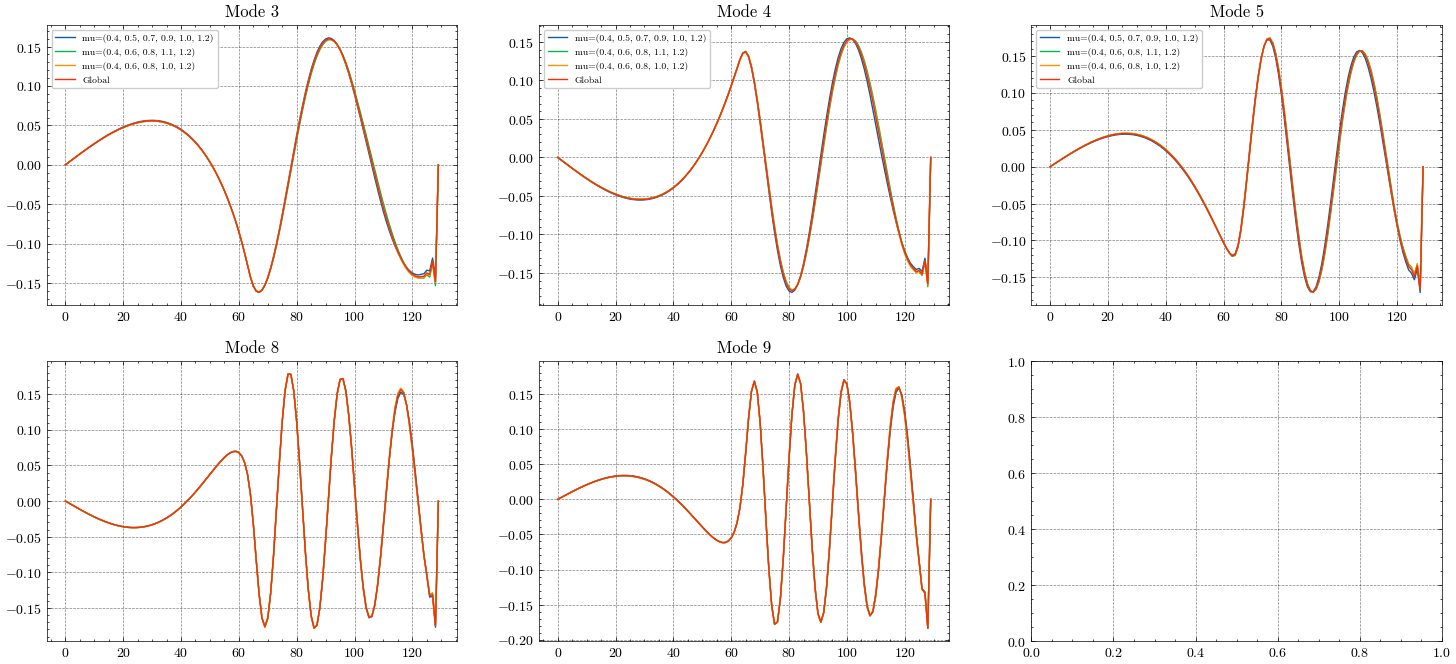

In [35]:
# plot the modes of the aligned signs modes
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(V_combined_lst_stochastic)):
        axs[0, i].plot(V_combined_lst_stochastic[j][:, i+3], label=names_sel[j])
        axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")

for i in range(2):
    for j in range(len(V_combined_lst_stochastic)):
        axs[1, i].plot(V_combined_lst_stochastic[j][:, r + i], label=names_sel[j])
    axs[1, i].set_title(f"Mode {r + i}")

In [36]:
import numpy as np
import itertools
from stiefel import *
import importlib
importlib.reload(stiefel)

N_stiefel_samples = 3000

# the global ROB as reference base point
U0 = V_combined_lst_stochastic[-1]

# number of models excluding the global ROB
num_models = len(V_combined_lst_stochastic) - 1

# rob has shape (num_models, n_points, n), where n_points is the number of points and n is the number of eigenvectors (order of samples)
n_points = V_combined_lst_stochastic[0].shape[0]
n = V_combined_lst_stochastic[0].shape[1]

# get the tangent vectors deltas
tau=0.00001
Deltas = batch_stiefel_log(U0, V_combined_lst_stochastic, tau=tau, metric_alpha=0)

# calculate condiiton number of the matrix H in the quadratic programming problem
X = np.reshape(Deltas[:num_models, :, :], (num_models, -1))
H = X @ X.T

print("Condition number: ", np.linalg.cond(H))

Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Condition number:  566.5441223964541


In [37]:
# Generate the samples and split them into two arrays
stiefel_samples_combined, maxI, beta = stiefel.gen_stiefel_samples(N_stiefel_samples, V_combined_lst_stochastic, tau=0.00001, metric_alpha=0.0000000000)

# # Align signs of stiefel samples with global ROB
# for i in range(len(stiefel_samples_combined)):
#     max_inds = np.argmax(V_combined_lst_stochastic[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
#     for j in range(stiefel_samples_combined[i].shape[1]):
#         if np.sign(stiefel_samples_combined[i][max_inds[j], j]) != np.sign(V_combined_lst_stochastic[-1][max_inds[j], j]):
#             stiefel_samples_combined[i][:, j] = -stiefel_samples_combined[i][:, j]

stiefel_samples_Vr = np.array([sample[:, :r] for sample in stiefel_samples_combined])
stiefel_samples_Vbar = np.array([sample[:, r:r+q_trunc] for sample in stiefel_samples_combined])

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) May 24 05:14:47 AM: Your problem has 3 variables, 2 constraints, and 0 parameters.
(CVXPY) May 24 05:14:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 24 05:14:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 24 05:14:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 24 05:14:47 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation

In [38]:
frechet_mean = calc_frechet_mean_mat(stiefel_samples_combined, V_combined_lst_stochastic[-1], eps=1e-2, tau=1e-3)

Vr_frechet_mean = frechet_mean[0][:, :r]
Vbar_frechet_mean = frechet_mean[0][:, r:+r+q_trunc]

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic

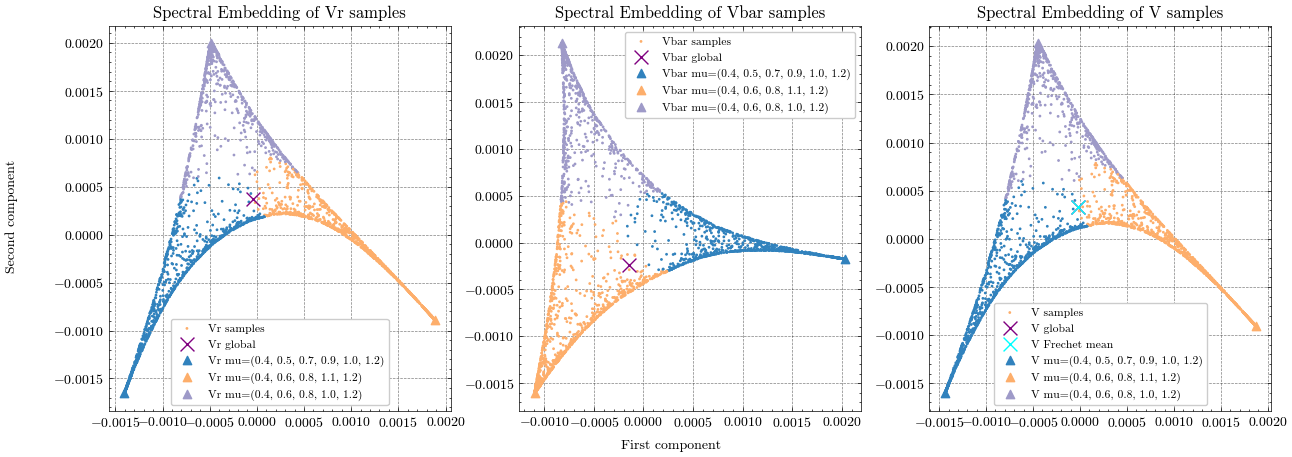

In [39]:
# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst_sel], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst_sel], axis=1)
flat_V_combined_arr = np.concatenate([rob.flatten()[:, None] for rob in V_combined_lst_stochastic], axis=1)
flat_Vr_frechet_mean = Vr_frechet_mean.flatten()[:, None]
flat_Vbar_frechet_mean = Vbar_frechet_mean.flatten()[:, None]
rob_Vr_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_Vr] + [flat_Vr_arr] + [flat_Vr_frechet_mean], axis=1)
rob_Vbar_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_Vbar] + [flat_Vbar_arr] + [flat_Vbar_frechet_mean], axis=1)
rob_V_combined_all = np.concatenate([rob.flatten()[:, None] for rob in stiefel_samples_combined] + [flat_V_combined_arr] + [frechet_mean[0].flatten()[:, None]], axis=1)

from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst_sel)))

# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(rob_Vr_all.T)
embedding_Vbar = embedder.fit_transform(rob_Vbar_all.T)
embedding_V_combined = embedder.fit_transform(rob_V_combined_all.T)

# Plot the embeddings
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# plt.scatter(embedding_Vr[:-2, 0], embedding_Vr[:-2, 1], color='grey', s=1, label='Vr samples')
plt.scatter(embedding_Vr[:N_stiefel_samples, 0], embedding_Vr[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='Vr samples')
plt.scatter(embedding_Vr[-2, 0], embedding_Vr[-2, 1], color='purple', label='Vr global', marker='x', s=100)
# plt.scatter(embedding_Vr[-1, 0], embedding_Vr[-1, 1], color='cyan', label='Vr Frechet mean', marker='x', s=100)


for i in range(len(Vr_lst_sel)-1):
    plt.scatter(embedding_Vr[N_stiefel_samples+i, 0], embedding_Vr[N_stiefel_samples+i, 1], color=colors[i], label=f"Vr {names_sel[i]}", marker='^')
    # plt.scatter(embedding_Vr[-i-2, 0], embedding_Vr[-i-2, 1], label=f"Vr {names[-i-1]}, $\\beta$={beta[-1]:.2e}", marker='^', color=colors[i])

plt.legend(fontsize='small')
plt.title('Spectral Embedding of Vr samples')
# plt.xlabel('First component')
# plt.ylabel('Second component')


plt.subplot(1, 3, 2)
plt.scatter(embedding_Vbar[:N_stiefel_samples, 0], embedding_Vbar[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='Vbar samples')
plt.scatter(embedding_Vbar[-2, 0], embedding_Vbar[-2, 1], color='purple', label='Vbar global', marker='x', s=100)
# plt.scatter(embedding_Vbar[-1, 0], embedding_Vbar[-1, 1], color='cyan', label='Vbar Frechet mean', marker='x', s=100)

for i in range(len(Vbar_lst_sel)-1):
    plt.scatter(embedding_Vbar[N_stiefel_samples+i, 0], embedding_Vbar[N_stiefel_samples+i, 1], color=colors[i], label=f"Vbar {names_sel[i]}", marker='^')
    # print(f"Vbar {names_sel[-i-1]}")
    # plt.scatter(embedding_Vbar[-i-2, 0], embedding_Vbar[-i-2, 1], label=f"Vbar {names[-i-1]}, $\\beta$={beta[-1]:.2e}", marker='^', color=colors[i])
    

plt.legend(fontsize='small')
plt.title('Spectral Embedding of Vbar samples')


plt.subplot(1, 3, 3)
plt.scatter(embedding_V_combined[:N_stiefel_samples, 0], embedding_V_combined[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='V samples')
plt.scatter(embedding_V_combined[-2, 0], embedding_V_combined[-2, 1], color='purple', label='V global', marker='x', s=100)
plt.scatter(embedding_V_combined[-1, 0], embedding_V_combined[-1, 1], color='cyan', label='V Frechet mean', marker='x', s=100)

for i in range(len(V_combined_lst_stochastic)-1):
    plt.scatter(embedding_V_combined[N_stiefel_samples+i, 0], embedding_V_combined[N_stiefel_samples+i, 1], color=colors[i], label=f"V {names_sel[i]}", marker='^')
    # print(f"Vbar {names_sel[-i-1]}")

plt.legend(fontsize='small')
plt.title('Spectral Embedding of V samples')
    


# plt.xlabel('First component')
# plt.ylabel('Second component')

# Add common x and y labels
fig.text(0.5, 0.04, 'First component', ha='center', va='center')
fig.text(0.06, 0.5, 'Second component', ha='center', va='center', rotation='vertical')
plt.show()

In [40]:
importlib.reload(stiefel)
from stiefel import *

names_sel_convex_comb = [names[i] for i in representatives]

# Use list comprehension to create operators_sel
operators_sel = [np.concatenate([np.array(operators_lst[i][key]) for key in operators_lst[0].keys()], axis=1) for i in representatives]

operators_sel = np.array(operators_sel)

print("Shape of operators_sel: ", operators_sel.shape)  

num_operators_sel = len(operators_sel)

operators_sel_vec = np.reshape(operators_sel, (num_operators_sel, -1))

N_convex_comb_samples = 1000

operator_samples, maxI_operator = gen_convex_comb_samples(N_samples=N_convex_comb_samples, beta=beta, X=operators_sel_vec)

Shape of operators_sel:  (3, 8, 145)


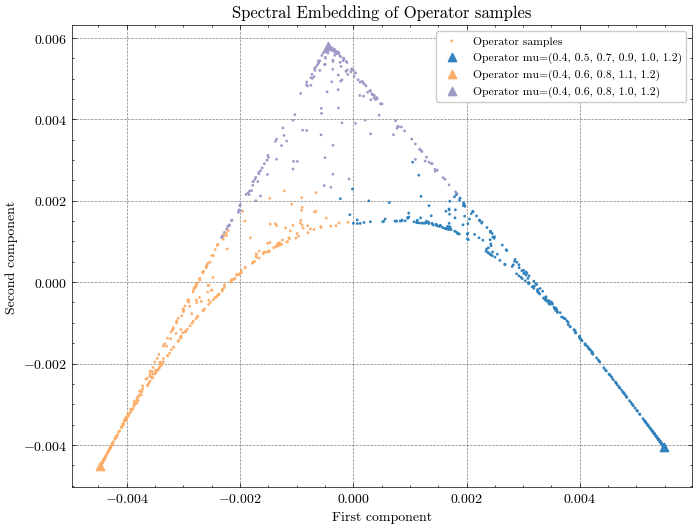

In [41]:
# plot spectral embedding of the generated operator samples
rob_operators_all = np.concatenate([rob.flatten()[:, None] for rob in operator_samples] + [operators_sel_vec.T], axis=1)

# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_operators = embedder.fit_transform(rob_operators_all.T)

# Plot the embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embedding_operators[:N_convex_comb_samples, 0], embedding_operators[:N_convex_comb_samples, 1], color=colors[maxI_operator], s=1, label='Operator samples')

for i in range(num_operators_sel):
    plt.scatter(embedding_operators[N_convex_comb_samples+i, 0], embedding_operators[N_convex_comb_samples+i, 1], color=colors[i], label=f"Operator {names_sel_convex_comb[i]}", marker='^')
    
plt.legend(fontsize='small')
plt.title('Spectral Embedding of Operator samples')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

In [42]:
X_lst_sel_convex_comb = [X_list[i] for i in representatives]
X_ref_lst_sel_convex_comb = [np.mean(X, axis=1)[:, None] for X in X_lst_sel_convex_comb]
Vr_lst_sel_convex_comb = [Vr_lst[i] for i in representatives]
Vbar_lst_sel_convex_comb = [Vbar_lst[i] for i in representatives]

In [43]:
names[representatives[0]]

'mu=(0.4, 0.5, 0.7, 0.9, 1.0, 1.2)'

In [44]:
# evaluate response of the samples localized at one model

abs_error_full_lst_convex_comb = []
relative_error_testing_window_lst_convex_comb = []
relative_error_training_window_lst_convex_comb = []
s_rec_full_lst_convex_comb = []


for i in tqdm.tqdm(range(N_convex_comb_samples)):
    
    X = X_lst_sel_convex_comb[maxI_operator[i]]
    X_ref = np.mean(X, axis=1)[:, None]
    
    Vr_sample = Vr_lst_sel_convex_comb[maxI_operator[i]]
    Vbar_sample = Vbar_lst_sel_convex_comb[maxI_operator[i]]
    
    operator_keys = operators_lst[0].keys()
    operators_shape = [operators_lst[0][key].shape for key in operator_keys]
    
    # operators = {key: operator_samples[i][ind:ind+shape[0]*shape[1]].reshape(shape) for ind, shape, key in zip(itertools.accumulate([0] + [shape[0]*shape[1] for shape in operators_shape]), operators_shape, operator_keys)}    
    
    operators = operators_lst[maxI_operator[i]]
    # try taking only A
    operators['A'] = operator_samples[i][:operators_shape[0][0]*operators_shape[0][1]].reshape(operators_shape[0])

    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr_sample.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    

    modelform = config['params']['modelform']
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
                
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    
    Xi = Xi_lst[representatives[maxI_operator[i]]]
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr_sample @ s_hat_full + Vbar_sample @ Xi @ poly_full
    
    try:
        abs_error_full = np.abs(X_all_test.T - s_rec_full)
        relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
        relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
        
        abs_error_full_lst_convex_comb.append(abs_error_full)
        relative_error_testing_window_lst_convex_comb.append(relative_error_testing_window)
        relative_error_training_window_lst_convex_comb.append(relative_error_training_window)
        s_rec_full_lst_convex_comb.append(s_rec_full)
        
    except Exception as e:
        print(e)
        print("Error in iteration: ", i)
        continue    

  1%|          | 10/1000 [00:00<00:21, 45.53it/s]

operands could not be broadcast together with shapes (130,8000) (130,3832) 
Error in iteration:  0
operands could not be broadcast together with shapes (130,8000) (130,4006) 
Error in iteration:  1
operands could not be broadcast together with shapes (130,8000) (130,2159) 
Error in iteration:  2
operands could not be broadcast together with shapes (130,8000) (130,2229) 
Error in iteration:  3
operands could not be broadcast together with shapes (130,8000) (130,3873) 
Error in iteration:  5
operands could not be broadcast together with shapes (130,8000) (130,3652) 
Error in iteration:  6
operands could not be broadcast together with shapes (130,8000) (130,3637) 
Error in iteration:  7
operands could not be broadcast together with shapes (130,8000) (130,2154) 
Error in iteration:  8
operands could not be broadcast together with shapes (130,8000) (130,3873) 
Error in iteration:  9


  2%|▏         | 20/1000 [00:00<00:20, 47.23it/s]

operands could not be broadcast together with shapes (130,8000) (130,2055) 
Error in iteration:  10
operands could not be broadcast together with shapes (130,8000) (130,5128) 
Error in iteration:  11
operands could not be broadcast together with shapes (130,8000) (130,4403) 
Error in iteration:  12
operands could not be broadcast together with shapes (130,8000) (130,2421) 
Error in iteration:  13
operands could not be broadcast together with shapes (130,8000) (130,2017) 
Error in iteration:  14
operands could not be broadcast together with shapes (130,8000) (130,4848) 
Error in iteration:  15
operands could not be broadcast together with shapes (130,8000) (130,2101) 
Error in iteration:  16
operands could not be broadcast together with shapes (130,8000) (130,2215) 
Error in iteration:  17
operands could not be broadcast together with shapes (130,8000) (130,1972) 
Error in iteration:  18
operands could not be broadcast together with shapes (130,8000) (130,3973) 
Error in iteration:  19


  3%|▎         | 30/1000 [00:00<00:20, 47.00it/s]

operands could not be broadcast together with shapes (130,8000) (130,7840) 
Error in iteration:  20
operands could not be broadcast together with shapes (130,8000) (130,2174) 
Error in iteration:  21
operands could not be broadcast together with shapes (130,8000) (130,3857) 
Error in iteration:  22
operands could not be broadcast together with shapes (130,8000) (130,2288) 
Error in iteration:  23
operands could not be broadcast together with shapes (130,8000) (130,3711) 
Error in iteration:  24
operands could not be broadcast together with shapes (130,8000) (130,3964) 
Error in iteration:  25
operands could not be broadcast together with shapes (130,8000) (130,3899) 
Error in iteration:  26
operands could not be broadcast together with shapes (130,8000) (130,3958) 
Error in iteration:  27
operands could not be broadcast together with shapes (130,8000) (130,2036) 
Error in iteration:  28
operands could not be broadcast together with shapes (130,8000) (130,2305) 
Error in iteration:  29


  4%|▍         | 40/1000 [00:00<00:19, 48.05it/s]

operands could not be broadcast together with shapes (130,8000) (130,2153) 
Error in iteration:  30
operands could not be broadcast together with shapes (130,8000) (130,3352) 
Error in iteration:  31
operands could not be broadcast together with shapes (130,8000) (130,2412) 
Error in iteration:  32
operands could not be broadcast together with shapes (130,8000) (130,2171) 
Error in iteration:  33
operands could not be broadcast together with shapes (130,8000) (130,2009) 
Error in iteration:  34
operands could not be broadcast together with shapes (130,8000) (130,3631) 
Error in iteration:  35
operands could not be broadcast together with shapes (130,8000) (130,4843) 
Error in iteration:  36
operands could not be broadcast together with shapes (130,8000) (130,3951) 
Error in iteration:  37
operands could not be broadcast together with shapes (130,8000) (130,2075) 
Error in iteration:  38
operands could not be broadcast together with shapes (130,8000) (130,2015) 
Error in iteration:  39


  5%|▌         | 50/1000 [00:01<00:19, 47.56it/s]

operands could not be broadcast together with shapes (130,8000) (130,3589) 
Error in iteration:  40
operands could not be broadcast together with shapes (130,8000) (130,4020) 
Error in iteration:  41
operands could not be broadcast together with shapes (130,8000) (130,3617) 
Error in iteration:  42
operands could not be broadcast together with shapes (130,8000) (130,4008) 
Error in iteration:  43
operands could not be broadcast together with shapes (130,8000) (130,2312) 
Error in iteration:  44
operands could not be broadcast together with shapes (130,8000) (130,2452) 
Error in iteration:  45
operands could not be broadcast together with shapes (130,8000) (130,3945) 
Error in iteration:  46
operands could not be broadcast together with shapes (130,8000) (130,3372) 
Error in iteration:  47
operands could not be broadcast together with shapes (130,8000) (130,2114) 
Error in iteration:  48
operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  49


  6%|▌         | 60/1000 [00:01<00:20, 46.87it/s]

operands could not be broadcast together with shapes (130,8000) (130,2068) 
Error in iteration:  50
operands could not be broadcast together with shapes (130,8000) (130,2168) 
Error in iteration:  51
operands could not be broadcast together with shapes (130,8000) (130,6276) 
Error in iteration:  52
operands could not be broadcast together with shapes (130,8000) (130,4646) 
Error in iteration:  53
operands could not be broadcast together with shapes (130,8000) (130,2155) 
Error in iteration:  54
operands could not be broadcast together with shapes (130,8000) (130,5822) 
Error in iteration:  55
operands could not be broadcast together with shapes (130,8000) (130,3375) 
Error in iteration:  56
operands could not be broadcast together with shapes (130,8000) (130,3867) 
Error in iteration:  57
operands could not be broadcast together with shapes (130,8000) (130,3676) 
Error in iteration:  58
operands could not be broadcast together with shapes (130,8000) (130,3876) 
Error in iteration:  59


  7%|▋         | 70/1000 [00:01<00:19, 47.06it/s]

operands could not be broadcast together with shapes (130,8000) (130,4863) 
Error in iteration:  60
operands could not be broadcast together with shapes (130,8000) (130,2624) 
Error in iteration:  61
operands could not be broadcast together with shapes (130,8000) (130,2156) 
Error in iteration:  62
operands could not be broadcast together with shapes (130,8000) (130,1972) 
Error in iteration:  63
operands could not be broadcast together with shapes (130,8000) (130,1969) 
Error in iteration:  64
operands could not be broadcast together with shapes (130,8000) (130,3848) 
Error in iteration:  65
operands could not be broadcast together with shapes (130,8000) (130,2062) 
Error in iteration:  66
operands could not be broadcast together with shapes (130,8000) (130,3595) 
Error in iteration:  67
operands could not be broadcast together with shapes (130,8000) (130,2115) 
Error in iteration:  68
operands could not be broadcast together with shapes (130,8000) (130,5603) 
Error in iteration:  69


  8%|▊         | 80/1000 [00:01<00:19, 47.19it/s]

operands could not be broadcast together with shapes (130,8000) (130,3798) 
Error in iteration:  70
operands could not be broadcast together with shapes (130,8000) (130,5363) 
Error in iteration:  71
operands could not be broadcast together with shapes (130,8000) (130,2266) 
Error in iteration:  72
operands could not be broadcast together with shapes (130,8000) (130,2092) 
Error in iteration:  73
operands could not be broadcast together with shapes (130,8000) (130,3599) 
Error in iteration:  74
operands could not be broadcast together with shapes (130,8000) (130,2169) 
Error in iteration:  75
operands could not be broadcast together with shapes (130,8000) (130,3754) 
Error in iteration:  76
operands could not be broadcast together with shapes (130,8000) (130,5089) 
Error in iteration:  77
operands could not be broadcast together with shapes (130,8000) (130,3607) 
Error in iteration:  78
operands could not be broadcast together with shapes (130,8000) (130,2205) 
Error in iteration:  79


  9%|▉         | 90/1000 [00:01<00:19, 46.93it/s]

operands could not be broadcast together with shapes (130,8000) (130,3643) 
Error in iteration:  80
operands could not be broadcast together with shapes (130,8000) (130,3809) 
Error in iteration:  81
operands could not be broadcast together with shapes (130,8000) (130,1941) 
Error in iteration:  82
operands could not be broadcast together with shapes (130,8000) (130,4643) 
Error in iteration:  83
operands could not be broadcast together with shapes (130,8000) (130,4748) 
Error in iteration:  84
operands could not be broadcast together with shapes (130,8000) (130,3680) 
Error in iteration:  85
operands could not be broadcast together with shapes (130,8000) (130,2155) 
Error in iteration:  86
operands could not be broadcast together with shapes (130,8000) (130,5284) 
Error in iteration:  87
operands could not be broadcast together with shapes (130,8000) (130,1982) 
Error in iteration:  88
operands could not be broadcast together with shapes (130,8000) (130,3988) 
Error in iteration:  89


 10%|█         | 100/1000 [00:02<00:19, 47.08it/s]

operands could not be broadcast together with shapes (130,8000) (130,4008) 
Error in iteration:  90
operands could not be broadcast together with shapes (130,8000) (130,2174) 
Error in iteration:  91
operands could not be broadcast together with shapes (130,8000) (130,1984) 
Error in iteration:  92
operands could not be broadcast together with shapes (130,8000) (130,1998) 
Error in iteration:  93
operands could not be broadcast together with shapes (130,8000) (130,2066) 
Error in iteration:  94
operands could not be broadcast together with shapes (130,8000) (130,7651) 
Error in iteration:  95
operands could not be broadcast together with shapes (130,8000) (130,2347) 
Error in iteration:  96
operands could not be broadcast together with shapes (130,8000) (130,4894) 
Error in iteration:  97
operands could not be broadcast together with shapes (130,8000) (130,3771) 
Error in iteration:  98
operands could not be broadcast together with shapes (130,8000) (130,2001) 
Error in iteration:  99


 11%|█         | 110/1000 [00:02<00:19, 46.59it/s]

operands could not be broadcast together with shapes (130,8000) (130,3987) 
Error in iteration:  100
operands could not be broadcast together with shapes (130,8000) (130,2042) 
Error in iteration:  101
operands could not be broadcast together with shapes (130,8000) (130,2087) 
Error in iteration:  102
operands could not be broadcast together with shapes (130,8000) (130,2190) 
Error in iteration:  103
operands could not be broadcast together with shapes (130,8000) (130,3864) 
Error in iteration:  104
operands could not be broadcast together with shapes (130,8000) (130,4902) 
Error in iteration:  105
operands could not be broadcast together with shapes (130,8000) (130,4838) 
Error in iteration:  106
operands could not be broadcast together with shapes (130,8000) (130,7939) 
Error in iteration:  107
operands could not be broadcast together with shapes (130,8000) (130,3669) 
Error in iteration:  108
operands could not be broadcast together with shapes (130,8000) (130,2102) 
Error in iterat

 12%|█▏        | 120/1000 [00:02<00:18, 47.32it/s]

operands could not be broadcast together with shapes (130,8000) (130,3848) 
Error in iteration:  110
operands could not be broadcast together with shapes (130,8000) (130,4588) 
Error in iteration:  111
operands could not be broadcast together with shapes (130,8000) (130,3990) 
Error in iteration:  112
operands could not be broadcast together with shapes (130,8000) (130,3783) 
Error in iteration:  113
operands could not be broadcast together with shapes (130,8000) (130,2129) 
Error in iteration:  115
operands could not be broadcast together with shapes (130,8000) (130,2509) 
Error in iteration:  116
operands could not be broadcast together with shapes (130,8000) (130,2117) 
Error in iteration:  117
operands could not be broadcast together with shapes (130,8000) (130,1972) 
Error in iteration:  118
operands could not be broadcast together with shapes (130,8000) (130,5759) 
Error in iteration:  119


 12%|█▎        | 125/1000 [00:02<00:18, 47.41it/s]

operands could not be broadcast together with shapes (130,8000) (130,1996) 
Error in iteration:  120
operands could not be broadcast together with shapes (130,8000) (130,4932) 
Error in iteration:  121
operands could not be broadcast together with shapes (130,8000) (130,3838) 
Error in iteration:  122
operands could not be broadcast together with shapes (130,8000) (130,3524) 
Error in iteration:  123
operands could not be broadcast together with shapes (130,8000) (130,3856) 
Error in iteration:  124
operands could not be broadcast together with shapes (130,8000) (130,4127) 
Error in iteration:  125
operands could not be broadcast together with shapes (130,8000) (130,2163) 
Error in iteration:  126
operands could not be broadcast together with shapes (130,8000) (130,3774) 
Error in iteration:  128
operands could not be broadcast together with shapes (130,8000) (130,3822) 
Error in iteration:  129


 14%|█▎        | 136/1000 [00:02<00:17, 48.11it/s]

operands could not be broadcast together with shapes (130,8000) (130,7445) 
Error in iteration:  130
operands could not be broadcast together with shapes (130,8000) (130,3777) 
Error in iteration:  131
operands could not be broadcast together with shapes (130,8000) (130,2166) 
Error in iteration:  132
operands could not be broadcast together with shapes (130,8000) (130,3721) 
Error in iteration:  133
operands could not be broadcast together with shapes (130,8000) (130,3408) 
Error in iteration:  134
operands could not be broadcast together with shapes (130,8000) (130,2221) 
Error in iteration:  135
operands could not be broadcast together with shapes (130,8000) (130,3946) 
Error in iteration:  136
operands could not be broadcast together with shapes (130,8000) (130,3586) 
Error in iteration:  137
operands could not be broadcast together with shapes (130,8000) (130,7255) 
Error in iteration:  138
operands could not be broadcast together with shapes (130,8000) (130,2253) 
Error in iterat

 15%|█▍        | 146/1000 [00:03<00:18, 46.98it/s]

operands could not be broadcast together with shapes (130,8000) (130,3637) 
Error in iteration:  140
operands could not be broadcast together with shapes (130,8000) (130,4067) 
Error in iteration:  141
operands could not be broadcast together with shapes (130,8000) (130,3834) 
Error in iteration:  142
operands could not be broadcast together with shapes (130,8000) (130,3877) 
Error in iteration:  143
operands could not be broadcast together with shapes (130,8000) (130,3658) 
Error in iteration:  144
operands could not be broadcast together with shapes (130,8000) (130,2153) 
Error in iteration:  145
operands could not be broadcast together with shapes (130,8000) (130,2293) 
Error in iteration:  146
operands could not be broadcast together with shapes (130,8000) (130,5284) 
Error in iteration:  147
operands could not be broadcast together with shapes (130,8000) (130,4839) 
Error in iteration:  148
operands could not be broadcast together with shapes (130,8000) (130,4792) 
Error in iterat

 16%|█▌        | 156/1000 [00:03<00:18, 46.72it/s]

operands could not be broadcast together with shapes (130,8000) (130,2439) 
Error in iteration:  150
operands could not be broadcast together with shapes (130,8000) (130,1971) 
Error in iteration:  151
operands could not be broadcast together with shapes (130,8000) (130,3945) 
Error in iteration:  152
operands could not be broadcast together with shapes (130,8000) (130,3548) 
Error in iteration:  153
operands could not be broadcast together with shapes (130,8000) (130,2125) 
Error in iteration:  154
operands could not be broadcast together with shapes (130,8000) (130,3091) 
Error in iteration:  155
operands could not be broadcast together with shapes (130,8000) (130,3903) 
Error in iteration:  156
operands could not be broadcast together with shapes (130,8000) (130,2742) 
Error in iteration:  157
operands could not be broadcast together with shapes (130,8000) (130,2042) 
Error in iteration:  158
operands could not be broadcast together with shapes (130,8000) (130,1986) 
Error in iterat

 17%|█▋        | 166/1000 [00:03<00:17, 46.89it/s]

operands could not be broadcast together with shapes (130,8000) (130,3648) 
Error in iteration:  160
operands could not be broadcast together with shapes (130,8000) (130,3941) 
Error in iteration:  161
operands could not be broadcast together with shapes (130,8000) (130,6609) 
Error in iteration:  162
operands could not be broadcast together with shapes (130,8000) (130,2083) 
Error in iteration:  163
operands could not be broadcast together with shapes (130,8000) (130,3968) 
Error in iteration:  164
operands could not be broadcast together with shapes (130,8000) (130,2434) 
Error in iteration:  165
operands could not be broadcast together with shapes (130,8000) (130,3914) 
Error in iteration:  166
operands could not be broadcast together with shapes (130,8000) (130,3623) 
Error in iteration:  167
operands could not be broadcast together with shapes (130,8000) (130,2217) 
Error in iteration:  168
operands could not be broadcast together with shapes (130,8000) (130,4896) 
Error in iterat

 18%|█▊        | 176/1000 [00:03<00:17, 46.20it/s]

operands could not be broadcast together with shapes (130,8000) (130,3653) 
Error in iteration:  170
operands could not be broadcast together with shapes (130,8000) (130,3566) 
Error in iteration:  171
operands could not be broadcast together with shapes (130,8000) (130,2018) 
Error in iteration:  172
operands could not be broadcast together with shapes (130,8000) (130,3644) 
Error in iteration:  173
operands could not be broadcast together with shapes (130,8000) (130,7293) 
Error in iteration:  174
operands could not be broadcast together with shapes (130,8000) (130,3612) 
Error in iteration:  175
operands could not be broadcast together with shapes (130,8000) (130,3550) 
Error in iteration:  176
operands could not be broadcast together with shapes (130,8000) (130,2182) 
Error in iteration:  177
operands could not be broadcast together with shapes (130,8000) (130,3991) 
Error in iteration:  178
operands could not be broadcast together with shapes (130,8000) (130,2075) 
Error in iterat

 19%|█▊        | 186/1000 [00:03<00:17, 46.82it/s]

operands could not be broadcast together with shapes (130,8000) (130,3680) 
Error in iteration:  180
operands could not be broadcast together with shapes (130,8000) (130,2107) 
Error in iteration:  181
operands could not be broadcast together with shapes (130,8000) (130,2064) 
Error in iteration:  182
operands could not be broadcast together with shapes (130,8000) (130,3919) 
Error in iteration:  183
operands could not be broadcast together with shapes (130,8000) (130,3558) 
Error in iteration:  184
operands could not be broadcast together with shapes (130,8000) (130,1925) 
Error in iteration:  185
operands could not be broadcast together with shapes (130,8000) (130,1997) 
Error in iteration:  186
operands could not be broadcast together with shapes (130,8000) (130,2132) 
Error in iteration:  187
operands could not be broadcast together with shapes (130,8000) (130,3608) 
Error in iteration:  188
operands could not be broadcast together with shapes (130,8000) (130,3440) 
Error in iterat

 20%|█▉        | 196/1000 [00:04<00:17, 46.54it/s]

operands could not be broadcast together with shapes (130,8000) (130,5837) 
Error in iteration:  190
operands could not be broadcast together with shapes (130,8000) (130,2136) 
Error in iteration:  191
operands could not be broadcast together with shapes (130,8000) (130,3647) 
Error in iteration:  192
operands could not be broadcast together with shapes (130,8000) (130,3970) 
Error in iteration:  193
operands could not be broadcast together with shapes (130,8000) (130,3606) 
Error in iteration:  194
operands could not be broadcast together with shapes (130,8000) (130,4880) 
Error in iteration:  195
operands could not be broadcast together with shapes (130,8000) (130,3609) 
Error in iteration:  196
operands could not be broadcast together with shapes (130,8000) (130,3975) 
Error in iteration:  197
operands could not be broadcast together with shapes (130,8000) (130,1961) 
Error in iteration:  198
operands could not be broadcast together with shapes (130,8000) (130,2155) 
Error in iterat

 21%|██        | 206/1000 [00:04<00:16, 46.77it/s]

operands could not be broadcast together with shapes (130,8000) (130,3704) 
Error in iteration:  200
operands could not be broadcast together with shapes (130,8000) (130,3880) 
Error in iteration:  201
operands could not be broadcast together with shapes (130,8000) (130,3870) 
Error in iteration:  202
operands could not be broadcast together with shapes (130,8000) (130,2159) 
Error in iteration:  203
operands could not be broadcast together with shapes (130,8000) (130,3985) 
Error in iteration:  204
operands could not be broadcast together with shapes (130,8000) (130,1969) 
Error in iteration:  205
operands could not be broadcast together with shapes (130,8000) (130,4021) 
Error in iteration:  206
operands could not be broadcast together with shapes (130,8000) (130,2348) 
Error in iteration:  207
operands could not be broadcast together with shapes (130,8000) (130,3695) 
Error in iteration:  208
operands could not be broadcast together with shapes (130,8000) (130,3514) 
Error in iterat

 22%|██▏       | 216/1000 [00:04<00:16, 46.88it/s]

operands could not be broadcast together with shapes (130,8000) (130,2138) 
Error in iteration:  210
operands could not be broadcast together with shapes (130,8000) (130,2406) 
Error in iteration:  211
operands could not be broadcast together with shapes (130,8000) (130,7548) 
Error in iteration:  212
operands could not be broadcast together with shapes (130,8000) (130,3806) 
Error in iteration:  213
operands could not be broadcast together with shapes (130,8000) (130,2195) 
Error in iteration:  214
operands could not be broadcast together with shapes (130,8000) (130,3570) 
Error in iteration:  215
operands could not be broadcast together with shapes (130,8000) (130,3788) 
Error in iteration:  216
operands could not be broadcast together with shapes (130,8000) (130,2369) 
Error in iteration:  217
operands could not be broadcast together with shapes (130,8000) (130,3800) 
Error in iteration:  218
operands could not be broadcast together with shapes (130,8000) (130,2497) 
Error in iterat

 23%|██▎       | 226/1000 [00:04<00:16, 46.99it/s]

operands could not be broadcast together with shapes (130,8000) (130,3601) 
Error in iteration:  220
operands could not be broadcast together with shapes (130,8000) (130,2141) 
Error in iteration:  221
operands could not be broadcast together with shapes (130,8000) (130,2052) 
Error in iteration:  222
operands could not be broadcast together with shapes (130,8000) (130,3552) 
Error in iteration:  223
operands could not be broadcast together with shapes (130,8000) (130,2292) 
Error in iteration:  224
operands could not be broadcast together with shapes (130,8000) (130,3741) 
Error in iteration:  225
operands could not be broadcast together with shapes (130,8000) (130,2109) 
Error in iteration:  226
operands could not be broadcast together with shapes (130,8000) (130,3659) 
Error in iteration:  227
operands could not be broadcast together with shapes (130,8000) (130,2440) 
Error in iteration:  228
operands could not be broadcast together with shapes (130,8000) (130,2100) 
Error in iterat

 24%|██▎       | 236/1000 [00:05<00:16, 46.81it/s]

operands could not be broadcast together with shapes (130,8000) (130,3762) 
Error in iteration:  230
operands could not be broadcast together with shapes (130,8000) (130,3774) 
Error in iteration:  231
operands could not be broadcast together with shapes (130,8000) (130,3595) 
Error in iteration:  232
operands could not be broadcast together with shapes (130,8000) (130,3568) 
Error in iteration:  233
operands could not be broadcast together with shapes (130,8000) (130,3623) 
Error in iteration:  234
operands could not be broadcast together with shapes (130,8000) (130,3983) 
Error in iteration:  235
operands could not be broadcast together with shapes (130,8000) (130,3592) 
Error in iteration:  236
operands could not be broadcast together with shapes (130,8000) (130,2952) 
Error in iteration:  237
operands could not be broadcast together with shapes (130,8000) (130,2175) 
Error in iteration:  238
operands could not be broadcast together with shapes (130,8000) (130,2129) 
Error in iterat

 25%|██▍       | 246/1000 [00:05<00:16, 46.94it/s]

operands could not be broadcast together with shapes (130,8000) (130,3876) 
Error in iteration:  240
operands could not be broadcast together with shapes (130,8000) (130,3643) 
Error in iteration:  241
operands could not be broadcast together with shapes (130,8000) (130,2135) 
Error in iteration:  242
operands could not be broadcast together with shapes (130,8000) (130,3672) 
Error in iteration:  243
operands could not be broadcast together with shapes (130,8000) (130,2164) 
Error in iteration:  244
operands could not be broadcast together with shapes (130,8000) (130,2153) 
Error in iteration:  245
operands could not be broadcast together with shapes (130,8000) (130,2167) 
Error in iteration:  246
operands could not be broadcast together with shapes (130,8000) (130,3817) 
Error in iteration:  247
operands could not be broadcast together with shapes (130,8000) (130,3828) 
Error in iteration:  248
operands could not be broadcast together with shapes (130,8000) (130,4308) 
Error in iterat

 26%|██▌       | 256/1000 [00:05<00:15, 46.90it/s]

operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  250
operands could not be broadcast together with shapes (130,8000) (130,3804) 
Error in iteration:  251
operands could not be broadcast together with shapes (130,8000) (130,2068) 
Error in iteration:  252
operands could not be broadcast together with shapes (130,8000) (130,1937) 
Error in iteration:  253
operands could not be broadcast together with shapes (130,8000) (130,2159) 
Error in iteration:  254
operands could not be broadcast together with shapes (130,8000) (130,4872) 
Error in iteration:  255
operands could not be broadcast together with shapes (130,8000) (130,3693) 
Error in iteration:  256
operands could not be broadcast together with shapes (130,8000) (130,3746) 
Error in iteration:  257
operands could not be broadcast together with shapes (130,8000) (130,3775) 
Error in iteration:  258
operands could not be broadcast together with shapes (130,8000) (130,4642) 
Error in iterat

 27%|██▋       | 266/1000 [00:05<00:15, 46.38it/s]

operands could not be broadcast together with shapes (130,8000) (130,4950) 
Error in iteration:  260
operands could not be broadcast together with shapes (130,8000) (130,3627) 
Error in iteration:  261
operands could not be broadcast together with shapes (130,8000) (130,3976) 
Error in iteration:  262
operands could not be broadcast together with shapes (130,8000) (130,3915) 
Error in iteration:  263
operands could not be broadcast together with shapes (130,8000) (130,3669) 
Error in iteration:  264
operands could not be broadcast together with shapes (130,8000) (130,2112) 
Error in iteration:  265
operands could not be broadcast together with shapes (130,8000) (130,3567) 
Error in iteration:  266
operands could not be broadcast together with shapes (130,8000) (130,4540) 
Error in iteration:  267
operands could not be broadcast together with shapes (130,8000) (130,5966) 
Error in iteration:  268
operands could not be broadcast together with shapes (130,8000) (130,1928) 
Error in iterat

 28%|██▊       | 276/1000 [00:05<00:15, 46.20it/s]

operands could not be broadcast together with shapes (130,8000) (130,2180) 
Error in iteration:  270
operands could not be broadcast together with shapes (130,8000) (130,2583) 
Error in iteration:  271
operands could not be broadcast together with shapes (130,8000) (130,4898) 
Error in iteration:  272
operands could not be broadcast together with shapes (130,8000) (130,3719) 
Error in iteration:  273
operands could not be broadcast together with shapes (130,8000) (130,2148) 
Error in iteration:  274
operands could not be broadcast together with shapes (130,8000) (130,2515) 
Error in iteration:  275
operands could not be broadcast together with shapes (130,8000) (130,3408) 
Error in iteration:  276
operands could not be broadcast together with shapes (130,8000) (130,3552) 
Error in iteration:  277
operands could not be broadcast together with shapes (130,8000) (130,4006) 
Error in iteration:  278
operands could not be broadcast together with shapes (130,8000) (130,3864) 
Error in iterat

 29%|██▊       | 286/1000 [00:06<00:15, 46.60it/s]

operands could not be broadcast together with shapes (130,8000) (130,1980) 
Error in iteration:  280
operands could not be broadcast together with shapes (130,8000) (130,1940) 
Error in iteration:  281
operands could not be broadcast together with shapes (130,8000) (130,4008) 
Error in iteration:  282
operands could not be broadcast together with shapes (130,8000) (130,2126) 
Error in iteration:  283
operands could not be broadcast together with shapes (130,8000) (130,3868) 
Error in iteration:  284
operands could not be broadcast together with shapes (130,8000) (130,3716) 
Error in iteration:  285
operands could not be broadcast together with shapes (130,8000) (130,2210) 
Error in iteration:  286
operands could not be broadcast together with shapes (130,8000) (130,2083) 
Error in iteration:  287
operands could not be broadcast together with shapes (130,8000) (130,3620) 
Error in iteration:  288
operands could not be broadcast together with shapes (130,8000) (130,3605) 
Error in iterat

 30%|██▉       | 296/1000 [00:06<00:15, 46.57it/s]

operands could not be broadcast together with shapes (130,8000) (130,1985) 
Error in iteration:  290
operands could not be broadcast together with shapes (130,8000) (130,3526) 
Error in iteration:  291
operands could not be broadcast together with shapes (130,8000) (130,3827) 
Error in iteration:  292
operands could not be broadcast together with shapes (130,8000) (130,2899) 
Error in iteration:  293
operands could not be broadcast together with shapes (130,8000) (130,5056) 
Error in iteration:  294
operands could not be broadcast together with shapes (130,8000) (130,3893) 
Error in iteration:  295
operands could not be broadcast together with shapes (130,8000) (130,2463) 
Error in iteration:  296
operands could not be broadcast together with shapes (130,8000) (130,5011) 
Error in iteration:  297
operands could not be broadcast together with shapes (130,8000) (130,3761) 
Error in iteration:  298
operands could not be broadcast together with shapes (130,8000) (130,3914) 
Error in iterat

 31%|███       | 306/1000 [00:06<00:15, 46.23it/s]

operands could not be broadcast together with shapes (130,8000) (130,7192) 
Error in iteration:  300
operands could not be broadcast together with shapes (130,8000) (130,3781) 
Error in iteration:  301
operands could not be broadcast together with shapes (130,8000) (130,3426) 
Error in iteration:  302
operands could not be broadcast together with shapes (130,8000) (130,4995) 
Error in iteration:  303
operands could not be broadcast together with shapes (130,8000) (130,2202) 
Error in iteration:  304
operands could not be broadcast together with shapes (130,8000) (130,3911) 
Error in iteration:  305
operands could not be broadcast together with shapes (130,8000) (130,4895) 
Error in iteration:  306
operands could not be broadcast together with shapes (130,8000) (130,3866) 
Error in iteration:  307
operands could not be broadcast together with shapes (130,8000) (130,4868) 
Error in iteration:  308


 32%|███▏      | 316/1000 [00:06<00:14, 45.80it/s]

operands could not be broadcast together with shapes (130,8000) (130,4912) 
Error in iteration:  309
operands could not be broadcast together with shapes (130,8000) (130,4920) 
Error in iteration:  310
operands could not be broadcast together with shapes (130,8000) (130,2152) 
Error in iteration:  311
operands could not be broadcast together with shapes (130,8000) (130,3587) 
Error in iteration:  312
operands could not be broadcast together with shapes (130,8000) (130,3365) 
Error in iteration:  313
operands could not be broadcast together with shapes (130,8000) (130,2095) 
Error in iteration:  314
operands could not be broadcast together with shapes (130,8000) (130,5021) 
Error in iteration:  315
operands could not be broadcast together with shapes (130,8000) (130,2234) 
Error in iteration:  316
operands could not be broadcast together with shapes (130,8000) (130,2160) 
Error in iteration:  317
operands could not be broadcast together with shapes (130,8000) (130,1993) 
Error in iterat

 33%|███▎      | 326/1000 [00:06<00:14, 46.92it/s]

operands could not be broadcast together with shapes (130,8000) (130,3564) 
Error in iteration:  319
operands could not be broadcast together with shapes (130,8000) (130,2156) 
Error in iteration:  320
operands could not be broadcast together with shapes (130,8000) (130,3675) 
Error in iteration:  321
operands could not be broadcast together with shapes (130,8000) (130,3698) 
Error in iteration:  322
operands could not be broadcast together with shapes (130,8000) (130,4291) 
Error in iteration:  323
operands could not be broadcast together with shapes (130,8000) (130,5064) 
Error in iteration:  324
operands could not be broadcast together with shapes (130,8000) (130,1965) 
Error in iteration:  325
operands could not be broadcast together with shapes (130,8000) (130,2285) 
Error in iteration:  326
operands could not be broadcast together with shapes (130,8000) (130,3676) 
Error in iteration:  327
operands could not be broadcast together with shapes (130,8000) (130,3916) 
Error in iterat

 34%|███▎      | 336/1000 [00:07<00:14, 46.26it/s]

operands could not be broadcast together with shapes (130,8000) (130,3527) 
Error in iteration:  329
operands could not be broadcast together with shapes (130,8000) (130,2155) 
Error in iteration:  330
operands could not be broadcast together with shapes (130,8000) (130,4985) 
Error in iteration:  331
operands could not be broadcast together with shapes (130,8000) (130,3749) 
Error in iteration:  332
operands could not be broadcast together with shapes (130,8000) (130,3764) 
Error in iteration:  333
operands could not be broadcast together with shapes (130,8000) (130,3599) 
Error in iteration:  334
operands could not be broadcast together with shapes (130,8000) (130,5208) 
Error in iteration:  335
operands could not be broadcast together with shapes (130,8000) (130,2104) 
Error in iteration:  336
operands could not be broadcast together with shapes (130,8000) (130,5191) 
Error in iteration:  337
operands could not be broadcast together with shapes (130,8000) (130,2049) 
Error in iterat

 35%|███▍      | 346/1000 [00:07<00:14, 46.44it/s]

operands could not be broadcast together with shapes (130,8000) (130,3387) 
Error in iteration:  339
operands could not be broadcast together with shapes (130,8000) (130,2369) 
Error in iteration:  340
operands could not be broadcast together with shapes (130,8000) (130,3849) 
Error in iteration:  341
operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  342
operands could not be broadcast together with shapes (130,8000) (130,1938) 
Error in iteration:  343
operands could not be broadcast together with shapes (130,8000) (130,3808) 
Error in iteration:  344
operands could not be broadcast together with shapes (130,8000) (130,2289) 
Error in iteration:  345
operands could not be broadcast together with shapes (130,8000) (130,3971) 
Error in iteration:  346
operands could not be broadcast together with shapes (130,8000) (130,3861) 
Error in iteration:  347
operands could not be broadcast together with shapes (130,8000) (130,4044) 
Error in iterat

 36%|███▌      | 356/1000 [00:07<00:13, 46.06it/s]

operands could not be broadcast together with shapes (130,8000) (130,3992) 
Error in iteration:  349
operands could not be broadcast together with shapes (130,8000) (130,3568) 
Error in iteration:  350
operands could not be broadcast together with shapes (130,8000) (130,2171) 
Error in iteration:  351
operands could not be broadcast together with shapes (130,8000) (130,3654) 
Error in iteration:  352
operands could not be broadcast together with shapes (130,8000) (130,3772) 
Error in iteration:  353
operands could not be broadcast together with shapes (130,8000) (130,3900) 
Error in iteration:  354
operands could not be broadcast together with shapes (130,8000) (130,2120) 
Error in iteration:  355
operands could not be broadcast together with shapes (130,8000) (130,2175) 
Error in iteration:  356
operands could not be broadcast together with shapes (130,8000) (130,5083) 
Error in iteration:  357
operands could not be broadcast together with shapes (130,8000) (130,2370) 
Error in iterat

 37%|███▋      | 366/1000 [00:07<00:13, 46.74it/s]

operands could not be broadcast together with shapes (130,8000) (130,2202) 
Error in iteration:  359
operands could not be broadcast together with shapes (130,8000) (130,3662) 
Error in iteration:  360
operands could not be broadcast together with shapes (130,8000) (130,2386) 
Error in iteration:  361
operands could not be broadcast together with shapes (130,8000) (130,2079) 
Error in iteration:  362
operands could not be broadcast together with shapes (130,8000) (130,1984) 
Error in iteration:  363
operands could not be broadcast together with shapes (130,8000) (130,2081) 
Error in iteration:  364
operands could not be broadcast together with shapes (130,8000) (130,5117) 
Error in iteration:  365
operands could not be broadcast together with shapes (130,8000) (130,3512) 
Error in iteration:  366
operands could not be broadcast together with shapes (130,8000) (130,3779) 
Error in iteration:  367
operands could not be broadcast together with shapes (130,8000) (130,3666) 
Error in iterat

 38%|███▊      | 376/1000 [00:08<00:13, 46.41it/s]

operands could not be broadcast together with shapes (130,8000) (130,3607) 
Error in iteration:  369
operands could not be broadcast together with shapes (130,8000) (130,3457) 
Error in iteration:  370
operands could not be broadcast together with shapes (130,8000) (130,3964) 
Error in iteration:  371
operands could not be broadcast together with shapes (130,8000) (130,2141) 
Error in iteration:  372
operands could not be broadcast together with shapes (130,8000) (130,3525) 
Error in iteration:  373
operands could not be broadcast together with shapes (130,8000) (130,3700) 
Error in iteration:  374
operands could not be broadcast together with shapes (130,8000) (130,4177) 
Error in iteration:  375
operands could not be broadcast together with shapes (130,8000) (130,4001) 
Error in iteration:  376
operands could not be broadcast together with shapes (130,8000) (130,2200) 
Error in iteration:  377


 39%|███▊      | 386/1000 [00:08<00:13, 44.23it/s]

operands could not be broadcast together with shapes (130,8000) (130,3902) 
Error in iteration:  378
operands could not be broadcast together with shapes (130,8000) (130,2183) 
Error in iteration:  379
operands could not be broadcast together with shapes (130,8000) (130,3580) 
Error in iteration:  380
operands could not be broadcast together with shapes (130,8000) (130,4854) 
Error in iteration:  381
operands could not be broadcast together with shapes (130,8000) (130,2166) 
Error in iteration:  382
operands could not be broadcast together with shapes (130,8000) (130,3920) 
Error in iteration:  383
operands could not be broadcast together with shapes (130,8000) (130,3626) 
Error in iteration:  384
operands could not be broadcast together with shapes (130,8000) (130,3631) 
Error in iteration:  385
operands could not be broadcast together with shapes (130,8000) (130,1950) 
Error in iteration:  386
operands could not be broadcast together with shapes (130,8000) (130,3648) 
Error in iterat

 40%|███▉      | 396/1000 [00:08<00:13, 45.28it/s]

operands could not be broadcast together with shapes (130,8000) (130,3595) 
Error in iteration:  388
operands could not be broadcast together with shapes (130,8000) (130,3924) 
Error in iteration:  389
operands could not be broadcast together with shapes (130,8000) (130,2130) 
Error in iteration:  390
operands could not be broadcast together with shapes (130,8000) (130,3594) 
Error in iteration:  391
operands could not be broadcast together with shapes (130,8000) (130,4881) 
Error in iteration:  392
operands could not be broadcast together with shapes (130,8000) (130,3674) 
Error in iteration:  393
operands could not be broadcast together with shapes (130,8000) (130,3704) 
Error in iteration:  394
operands could not be broadcast together with shapes (130,8000) (130,3893) 
Error in iteration:  395
operands could not be broadcast together with shapes (130,8000) (130,3613) 
Error in iteration:  396
operands could not be broadcast together with shapes (130,8000) (130,3897) 
Error in iterat

 41%|████      | 406/1000 [00:08<00:12, 46.72it/s]

operands could not be broadcast together with shapes (130,8000) (130,2019) 
Error in iteration:  398
operands could not be broadcast together with shapes (130,8000) (130,2154) 
Error in iteration:  399
operands could not be broadcast together with shapes (130,8000) (130,2092) 
Error in iteration:  400
operands could not be broadcast together with shapes (130,8000) (130,3464) 
Error in iteration:  401
operands could not be broadcast together with shapes (130,8000) (130,2074) 
Error in iteration:  402
operands could not be broadcast together with shapes (130,8000) (130,3946) 
Error in iteration:  403
operands could not be broadcast together with shapes (130,8000) (130,2136) 
Error in iteration:  404
operands could not be broadcast together with shapes (130,8000) (130,3673) 
Error in iteration:  405
operands could not be broadcast together with shapes (130,8000) (130,3932) 
Error in iteration:  406
operands could not be broadcast together with shapes (130,8000) (130,3978) 
Error in iterat

 42%|████▏     | 416/1000 [00:08<00:12, 47.05it/s]

operands could not be broadcast together with shapes (130,8000) (130,1932) 
Error in iteration:  408
operands could not be broadcast together with shapes (130,8000) (130,2024) 
Error in iteration:  409
operands could not be broadcast together with shapes (130,8000) (130,7224) 
Error in iteration:  410
operands could not be broadcast together with shapes (130,8000) (130,3648) 
Error in iteration:  411
operands could not be broadcast together with shapes (130,8000) (130,1978) 
Error in iteration:  412
operands could not be broadcast together with shapes (130,8000) (130,3714) 
Error in iteration:  413
operands could not be broadcast together with shapes (130,8000) (130,2036) 
Error in iteration:  414
operands could not be broadcast together with shapes (130,8000) (130,5142) 
Error in iteration:  415
operands could not be broadcast together with shapes (130,8000) (130,3716) 
Error in iteration:  416
operands could not be broadcast together with shapes (130,8000) (130,3785) 
Error in iterat

 43%|████▎     | 426/1000 [00:09<00:12, 47.26it/s]

operands could not be broadcast together with shapes (130,8000) (130,2234) 
Error in iteration:  418
operands could not be broadcast together with shapes (130,8000) (130,3608) 
Error in iteration:  419
operands could not be broadcast together with shapes (130,8000) (130,3864) 
Error in iteration:  420
operands could not be broadcast together with shapes (130,8000) (130,3667) 
Error in iteration:  421
operands could not be broadcast together with shapes (130,8000) (130,7083) 
Error in iteration:  422
operands could not be broadcast together with shapes (130,8000) (130,2002) 
Error in iteration:  423
operands could not be broadcast together with shapes (130,8000) (130,2024) 
Error in iteration:  424
operands could not be broadcast together with shapes (130,8000) (130,3762) 
Error in iteration:  425
operands could not be broadcast together with shapes (130,8000) (130,2297) 
Error in iteration:  426
operands could not be broadcast together with shapes (130,8000) (130,4928) 
Error in iterat

 44%|████▎     | 436/1000 [00:09<00:12, 46.33it/s]

operands could not be broadcast together with shapes (130,8000) (130,2760) 
Error in iteration:  428
operands could not be broadcast together with shapes (130,8000) (130,4824) 
Error in iteration:  429
operands could not be broadcast together with shapes (130,8000) (130,3621) 
Error in iteration:  430
operands could not be broadcast together with shapes (130,8000) (130,4887) 
Error in iteration:  431
operands could not be broadcast together with shapes (130,8000) (130,3744) 
Error in iteration:  432
operands could not be broadcast together with shapes (130,8000) (130,3663) 
Error in iteration:  433
operands could not be broadcast together with shapes (130,8000) (130,2029) 
Error in iteration:  434
operands could not be broadcast together with shapes (130,8000) (130,4525) 
Error in iteration:  435
operands could not be broadcast together with shapes (130,8000) (130,3787) 
Error in iteration:  436
operands could not be broadcast together with shapes (130,8000) (130,3552) 
Error in iterat

 45%|████▍     | 446/1000 [00:09<00:11, 46.41it/s]

operands could not be broadcast together with shapes (130,8000) (130,3642) 
Error in iteration:  438
operands could not be broadcast together with shapes (130,8000) (130,4002) 
Error in iteration:  439
operands could not be broadcast together with shapes (130,8000) (130,2146) 
Error in iteration:  440
operands could not be broadcast together with shapes (130,8000) (130,3866) 
Error in iteration:  441
operands could not be broadcast together with shapes (130,8000) (130,1942) 
Error in iteration:  442
operands could not be broadcast together with shapes (130,8000) (130,3623) 
Error in iteration:  443
operands could not be broadcast together with shapes (130,8000) (130,3892) 
Error in iteration:  444
operands could not be broadcast together with shapes (130,8000) (130,2067) 
Error in iteration:  445
operands could not be broadcast together with shapes (130,8000) (130,3734) 
Error in iteration:  446
operands could not be broadcast together with shapes (130,8000) (130,5667) 
Error in iterat

 46%|████▌     | 456/1000 [00:09<00:11, 46.44it/s]

operands could not be broadcast together with shapes (130,8000) (130,1939) 
Error in iteration:  448
operands could not be broadcast together with shapes (130,8000) (130,3896) 
Error in iteration:  449
operands could not be broadcast together with shapes (130,8000) (130,3572) 
Error in iteration:  450
operands could not be broadcast together with shapes (130,8000) (130,4392) 
Error in iteration:  451
operands could not be broadcast together with shapes (130,8000) (130,3814) 
Error in iteration:  452
operands could not be broadcast together with shapes (130,8000) (130,2614) 
Error in iteration:  453
operands could not be broadcast together with shapes (130,8000) (130,2023) 
Error in iteration:  454
operands could not be broadcast together with shapes (130,8000) (130,2168) 
Error in iteration:  455
operands could not be broadcast together with shapes (130,8000) (130,2216) 
Error in iteration:  456
operands could not be broadcast together with shapes (130,8000) (130,3576) 
Error in iterat

 47%|████▋     | 466/1000 [00:09<00:11, 46.94it/s]

operands could not be broadcast together with shapes (130,8000) (130,3818) 
Error in iteration:  458
operands could not be broadcast together with shapes (130,8000) (130,3701) 
Error in iteration:  459
operands could not be broadcast together with shapes (130,8000) (130,2242) 
Error in iteration:  460
operands could not be broadcast together with shapes (130,8000) (130,3700) 
Error in iteration:  461
operands could not be broadcast together with shapes (130,8000) (130,3578) 
Error in iteration:  462
operands could not be broadcast together with shapes (130,8000) (130,2122) 
Error in iteration:  463
operands could not be broadcast together with shapes (130,8000) (130,1963) 
Error in iteration:  464
operands could not be broadcast together with shapes (130,8000) (130,3452) 
Error in iteration:  465
operands could not be broadcast together with shapes (130,8000) (130,3549) 
Error in iteration:  466
operands could not be broadcast together with shapes (130,8000) (130,3889) 
Error in iterat

 48%|████▊     | 476/1000 [00:10<00:11, 46.50it/s]

operands could not be broadcast together with shapes (130,8000) (130,2725) 
Error in iteration:  468
operands could not be broadcast together with shapes (130,8000) (130,3978) 
Error in iteration:  469
operands could not be broadcast together with shapes (130,8000) (130,3680) 
Error in iteration:  470
operands could not be broadcast together with shapes (130,8000) (130,3545) 
Error in iteration:  471
operands could not be broadcast together with shapes (130,8000) (130,1998) 
Error in iteration:  472
operands could not be broadcast together with shapes (130,8000) (130,3704) 
Error in iteration:  473
operands could not be broadcast together with shapes (130,8000) (130,2182) 
Error in iteration:  474
operands could not be broadcast together with shapes (130,8000) (130,3791) 
Error in iteration:  475
operands could not be broadcast together with shapes (130,8000) (130,3608) 
Error in iteration:  476
operands could not be broadcast together with shapes (130,8000) (130,2142) 
Error in iterat

 49%|████▊     | 486/1000 [00:10<00:11, 46.08it/s]

operands could not be broadcast together with shapes (130,8000) (130,3859) 
Error in iteration:  478
operands could not be broadcast together with shapes (130,8000) (130,3586) 
Error in iteration:  479
operands could not be broadcast together with shapes (130,8000) (130,2157) 
Error in iteration:  480
operands could not be broadcast together with shapes (130,8000) (130,4825) 
Error in iteration:  481
operands could not be broadcast together with shapes (130,8000) (130,3709) 
Error in iteration:  482
operands could not be broadcast together with shapes (130,8000) (130,3647) 
Error in iteration:  483
operands could not be broadcast together with shapes (130,8000) (130,4081) 
Error in iteration:  484
operands could not be broadcast together with shapes (130,8000) (130,3629) 
Error in iteration:  485
operands could not be broadcast together with shapes (130,8000) (130,3569) 
Error in iteration:  486
operands could not be broadcast together with shapes (130,8000) (130,4967) 
Error in iterat

 50%|████▉     | 496/1000 [00:10<00:10, 46.54it/s]

operands could not be broadcast together with shapes (130,8000) (130,2439) 
Error in iteration:  488
operands could not be broadcast together with shapes (130,8000) (130,2092) 
Error in iteration:  489
operands could not be broadcast together with shapes (130,8000) (130,3991) 
Error in iteration:  490
operands could not be broadcast together with shapes (130,8000) (130,3551) 
Error in iteration:  491
operands could not be broadcast together with shapes (130,8000) (130,3799) 
Error in iteration:  492
operands could not be broadcast together with shapes (130,8000) (130,3550) 
Error in iteration:  493
operands could not be broadcast together with shapes (130,8000) (130,1945) 
Error in iteration:  494
operands could not be broadcast together with shapes (130,8000) (130,2157) 
Error in iteration:  495
operands could not be broadcast together with shapes (130,8000) (130,2772) 
Error in iteration:  496
operands could not be broadcast together with shapes (130,8000) (130,3532) 
Error in iterat

 51%|█████     | 507/1000 [00:10<00:10, 46.87it/s]

operands could not be broadcast together with shapes (130,8000) (130,2169) 
Error in iteration:  499
operands could not be broadcast together with shapes (130,8000) (130,3975) 
Error in iteration:  500
operands could not be broadcast together with shapes (130,8000) (130,3584) 
Error in iteration:  501
operands could not be broadcast together with shapes (130,8000) (130,2224) 
Error in iteration:  502
operands could not be broadcast together with shapes (130,8000) (130,4995) 
Error in iteration:  503
operands could not be broadcast together with shapes (130,8000) (130,5447) 
Error in iteration:  504
operands could not be broadcast together with shapes (130,8000) (130,3935) 
Error in iteration:  505
operands could not be broadcast together with shapes (130,8000) (130,3680) 
Error in iteration:  506
operands could not be broadcast together with shapes (130,8000) (130,2272) 
Error in iteration:  507
operands could not be broadcast together with shapes (130,8000) (130,2322) 
Error in iterat

 52%|█████▏    | 517/1000 [00:11<00:10, 47.01it/s]

operands could not be broadcast together with shapes (130,8000) (130,3720) 
Error in iteration:  509
operands could not be broadcast together with shapes (130,8000) (130,3869) 
Error in iteration:  510
operands could not be broadcast together with shapes (130,8000) (130,5689) 
Error in iteration:  511
operands could not be broadcast together with shapes (130,8000) (130,2156) 
Error in iteration:  512
operands could not be broadcast together with shapes (130,8000) (130,1955) 
Error in iteration:  513
operands could not be broadcast together with shapes (130,8000) (130,2036) 
Error in iteration:  514
operands could not be broadcast together with shapes (130,8000) (130,3673) 
Error in iteration:  515
operands could not be broadcast together with shapes (130,8000) (130,3597) 
Error in iteration:  516
operands could not be broadcast together with shapes (130,8000) (130,3596) 
Error in iteration:  517
operands could not be broadcast together with shapes (130,8000) (130,1970) 
Error in iterat

 53%|█████▎    | 527/1000 [00:11<00:10, 46.51it/s]

operands could not be broadcast together with shapes (130,8000) (130,2166) 
Error in iteration:  519
operands could not be broadcast together with shapes (130,8000) (130,2009) 
Error in iteration:  520
operands could not be broadcast together with shapes (130,8000) (130,2448) 
Error in iteration:  521
operands could not be broadcast together with shapes (130,8000) (130,3355) 
Error in iteration:  522
operands could not be broadcast together with shapes (130,8000) (130,4823) 
Error in iteration:  523
operands could not be broadcast together with shapes (130,8000) (130,2381) 
Error in iteration:  524
operands could not be broadcast together with shapes (130,8000) (130,2072) 
Error in iteration:  525
operands could not be broadcast together with shapes (130,8000) (130,4874) 
Error in iteration:  526
operands could not be broadcast together with shapes (130,8000) (130,2181) 
Error in iteration:  527
operands could not be broadcast together with shapes (130,8000) (130,3587) 
Error in iterat

 54%|█████▎    | 537/1000 [00:11<00:09, 47.62it/s]

operands could not be broadcast together with shapes (130,8000) (130,3647) 
Error in iteration:  529
operands could not be broadcast together with shapes (130,8000) (130,3749) 
Error in iteration:  530
operands could not be broadcast together with shapes (130,8000) (130,1972) 
Error in iteration:  531
operands could not be broadcast together with shapes (130,8000) (130,2037) 
Error in iteration:  533
operands could not be broadcast together with shapes (130,8000) (130,4111) 
Error in iteration:  534
operands could not be broadcast together with shapes (130,8000) (130,2157) 
Error in iteration:  535
operands could not be broadcast together with shapes (130,8000) (130,3598) 
Error in iteration:  536
operands could not be broadcast together with shapes (130,8000) (130,3650) 
Error in iteration:  537
operands could not be broadcast together with shapes (130,8000) (130,3678) 
Error in iteration:  538


 55%|█████▍    | 547/1000 [00:11<00:09, 47.66it/s]

operands could not be broadcast together with shapes (130,8000) (130,4120) 
Error in iteration:  539
operands could not be broadcast together with shapes (130,8000) (130,3625) 
Error in iteration:  540
operands could not be broadcast together with shapes (130,8000) (130,3797) 
Error in iteration:  541
operands could not be broadcast together with shapes (130,8000) (130,1951) 
Error in iteration:  542
operands could not be broadcast together with shapes (130,8000) (130,1969) 
Error in iteration:  543
operands could not be broadcast together with shapes (130,8000) (130,3815) 
Error in iteration:  544
operands could not be broadcast together with shapes (130,8000) (130,5473) 
Error in iteration:  545
operands could not be broadcast together with shapes (130,8000) (130,3612) 
Error in iteration:  546
operands could not be broadcast together with shapes (130,8000) (130,2132) 
Error in iteration:  547
operands could not be broadcast together with shapes (130,8000) (130,4483) 
Error in iterat

 56%|█████▌    | 557/1000 [00:11<00:09, 47.05it/s]

operands could not be broadcast together with shapes (130,8000) (130,3380) 
Error in iteration:  549
operands could not be broadcast together with shapes (130,8000) (130,2291) 
Error in iteration:  550
operands could not be broadcast together with shapes (130,8000) (130,3908) 
Error in iteration:  551
operands could not be broadcast together with shapes (130,8000) (130,4714) 
Error in iteration:  552
operands could not be broadcast together with shapes (130,8000) (130,3679) 
Error in iteration:  553
operands could not be broadcast together with shapes (130,8000) (130,2480) 
Error in iteration:  554
operands could not be broadcast together with shapes (130,8000) (130,3514) 
Error in iteration:  555
operands could not be broadcast together with shapes (130,8000) (130,2031) 
Error in iteration:  556
operands could not be broadcast together with shapes (130,8000) (130,2009) 
Error in iteration:  557
operands could not be broadcast together with shapes (130,8000) (130,3924) 
Error in iterat

 57%|█████▋    | 567/1000 [00:12<00:09, 46.81it/s]

operands could not be broadcast together with shapes (130,8000) (130,4570) 
Error in iteration:  559
operands could not be broadcast together with shapes (130,8000) (130,3763) 
Error in iteration:  560
operands could not be broadcast together with shapes (130,8000) (130,2134) 
Error in iteration:  561
operands could not be broadcast together with shapes (130,8000) (130,3871) 
Error in iteration:  562
operands could not be broadcast together with shapes (130,8000) (130,2207) 
Error in iteration:  563
operands could not be broadcast together with shapes (130,8000) (130,2558) 
Error in iteration:  564
operands could not be broadcast together with shapes (130,8000) (130,3883) 
Error in iteration:  565
operands could not be broadcast together with shapes (130,8000) (130,3506) 
Error in iteration:  566
operands could not be broadcast together with shapes (130,8000) (130,4139) 
Error in iteration:  567
operands could not be broadcast together with shapes (130,8000) (130,2565) 
Error in iterat

 58%|█████▊    | 577/1000 [00:12<00:09, 46.85it/s]

operands could not be broadcast together with shapes (130,8000) (130,2102) 
Error in iteration:  569
operands could not be broadcast together with shapes (130,8000) (130,3679) 
Error in iteration:  570
operands could not be broadcast together with shapes (130,8000) (130,3571) 
Error in iteration:  571
operands could not be broadcast together with shapes (130,8000) (130,2125) 
Error in iteration:  572
operands could not be broadcast together with shapes (130,8000) (130,3752) 
Error in iteration:  573
operands could not be broadcast together with shapes (130,8000) (130,1984) 
Error in iteration:  574
operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  575
operands could not be broadcast together with shapes (130,8000) (130,4254) 
Error in iteration:  576
operands could not be broadcast together with shapes (130,8000) (130,4710) 
Error in iteration:  577
operands could not be broadcast together with shapes (130,8000) (130,3670) 
Error in iterat

 59%|█████▊    | 587/1000 [00:12<00:08, 46.90it/s]

operands could not be broadcast together with shapes (130,8000) (130,2157) 
Error in iteration:  579
operands could not be broadcast together with shapes (130,8000) (130,2141) 
Error in iteration:  580
operands could not be broadcast together with shapes (130,8000) (130,3992) 
Error in iteration:  581
operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  582
operands could not be broadcast together with shapes (130,8000) (130,4522) 
Error in iteration:  583
operands could not be broadcast together with shapes (130,8000) (130,2113) 
Error in iteration:  584
operands could not be broadcast together with shapes (130,8000) (130,4001) 
Error in iteration:  585
operands could not be broadcast together with shapes (130,8000) (130,2175) 
Error in iteration:  586
operands could not be broadcast together with shapes (130,8000) (130,3856) 
Error in iteration:  587
operands could not be broadcast together with shapes (130,8000) (130,3680) 
Error in iterat

 60%|█████▉    | 597/1000 [00:12<00:08, 46.59it/s]

operands could not be broadcast together with shapes (130,8000) (130,4926) 
Error in iteration:  589
operands could not be broadcast together with shapes (130,8000) (130,2157) 
Error in iteration:  590
operands could not be broadcast together with shapes (130,8000) (130,3546) 
Error in iteration:  591
operands could not be broadcast together with shapes (130,8000) (130,1945) 
Error in iteration:  592
operands could not be broadcast together with shapes (130,8000) (130,3928) 
Error in iteration:  593
operands could not be broadcast together with shapes (130,8000) (130,2101) 
Error in iteration:  594
operands could not be broadcast together with shapes (130,8000) (130,3488) 
Error in iteration:  595
operands could not be broadcast together with shapes (130,8000) (130,3673) 
Error in iteration:  596
operands could not be broadcast together with shapes (130,8000) (130,3436) 
Error in iteration:  597
operands could not be broadcast together with shapes (130,8000) (130,3933) 
Error in iterat

 61%|██████    | 607/1000 [00:13<00:08, 46.94it/s]

operands could not be broadcast together with shapes (130,8000) (130,3584) 
Error in iteration:  599
operands could not be broadcast together with shapes (130,8000) (130,2039) 
Error in iteration:  600
operands could not be broadcast together with shapes (130,8000) (130,5814) 
Error in iteration:  601
operands could not be broadcast together with shapes (130,8000) (130,2001) 
Error in iteration:  602
operands could not be broadcast together with shapes (130,8000) (130,3663) 
Error in iteration:  603
operands could not be broadcast together with shapes (130,8000) (130,3851) 
Error in iteration:  604
operands could not be broadcast together with shapes (130,8000) (130,3872) 
Error in iteration:  605
operands could not be broadcast together with shapes (130,8000) (130,4119) 
Error in iteration:  606
operands could not be broadcast together with shapes (130,8000) (130,1970) 
Error in iteration:  607
operands could not be broadcast together with shapes (130,8000) (130,3539) 
Error in iterat

 62%|██████▏   | 617/1000 [00:13<00:08, 46.30it/s]

operands could not be broadcast together with shapes (130,8000) (130,7466) 
Error in iteration:  609
operands could not be broadcast together with shapes (130,8000) (130,3618) 
Error in iteration:  610
operands could not be broadcast together with shapes (130,8000) (130,3877) 
Error in iteration:  611
operands could not be broadcast together with shapes (130,8000) (130,3586) 
Error in iteration:  612
operands could not be broadcast together with shapes (130,8000) (130,6779) 
Error in iteration:  613
operands could not be broadcast together with shapes (130,8000) (130,2051) 
Error in iteration:  614
operands could not be broadcast together with shapes (130,8000) (130,3771) 
Error in iteration:  615
operands could not be broadcast together with shapes (130,8000) (130,3576) 
Error in iteration:  616
operands could not be broadcast together with shapes (130,8000) (130,2429) 
Error in iteration:  617
operands could not be broadcast together with shapes (130,8000) (130,2155) 
Error in iterat

 63%|██████▎   | 627/1000 [00:13<00:07, 46.89it/s]

operands could not be broadcast together with shapes (130,8000) (130,2154) 
Error in iteration:  619
operands could not be broadcast together with shapes (130,8000) (130,3611) 
Error in iteration:  620
operands could not be broadcast together with shapes (130,8000) (130,5063) 
Error in iteration:  621
operands could not be broadcast together with shapes (130,8000) (130,2138) 
Error in iteration:  622
operands could not be broadcast together with shapes (130,8000) (130,2066) 
Error in iteration:  623
operands could not be broadcast together with shapes (130,8000) (130,3628) 
Error in iteration:  624
operands could not be broadcast together with shapes (130,8000) (130,2065) 
Error in iteration:  625
operands could not be broadcast together with shapes (130,8000) (130,2041) 
Error in iteration:  626
operands could not be broadcast together with shapes (130,8000) (130,2618) 
Error in iteration:  627
operands could not be broadcast together with shapes (130,8000) (130,3595) 
Error in iterat

 64%|██████▎   | 637/1000 [00:13<00:07, 46.10it/s]

operands could not be broadcast together with shapes (130,8000) (130,3826) 
Error in iteration:  629
operands could not be broadcast together with shapes (130,8000) (130,3575) 
Error in iteration:  630
operands could not be broadcast together with shapes (130,8000) (130,3790) 
Error in iteration:  631
operands could not be broadcast together with shapes (130,8000) (130,2000) 
Error in iteration:  632
operands could not be broadcast together with shapes (130,8000) (130,4958) 
Error in iteration:  633
operands could not be broadcast together with shapes (130,8000) (130,2494) 
Error in iteration:  634
operands could not be broadcast together with shapes (130,8000) (130,4859) 
Error in iteration:  635
operands could not be broadcast together with shapes (130,8000) (130,3606) 
Error in iteration:  636
operands could not be broadcast together with shapes (130,8000) (130,4025) 
Error in iteration:  637
operands could not be broadcast together with shapes (130,8000) (130,3639) 
Error in iterat

 65%|██████▍   | 647/1000 [00:13<00:07, 46.11it/s]

operands could not be broadcast together with shapes (130,8000) (130,2300) 
Error in iteration:  639
operands could not be broadcast together with shapes (130,8000) (130,1952) 
Error in iteration:  640
operands could not be broadcast together with shapes (130,8000) (130,2575) 
Error in iteration:  641
operands could not be broadcast together with shapes (130,8000) (130,3996) 
Error in iteration:  642
operands could not be broadcast together with shapes (130,8000) (130,3658) 
Error in iteration:  643
operands could not be broadcast together with shapes (130,8000) (130,3811) 
Error in iteration:  644
operands could not be broadcast together with shapes (130,8000) (130,7176) 
Error in iteration:  645
operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  646
operands could not be broadcast together with shapes (130,8000) (130,2145) 
Error in iteration:  647
operands could not be broadcast together with shapes (130,8000) (130,3431) 
Error in iterat

 66%|██████▌   | 657/1000 [00:14<00:07, 46.44it/s]

operands could not be broadcast together with shapes (130,8000) (130,3869) 
Error in iteration:  649
operands could not be broadcast together with shapes (130,8000) (130,4943) 
Error in iteration:  650
operands could not be broadcast together with shapes (130,8000) (130,1994) 
Error in iteration:  651
operands could not be broadcast together with shapes (130,8000) (130,2000) 
Error in iteration:  652
operands could not be broadcast together with shapes (130,8000) (130,3930) 
Error in iteration:  653
operands could not be broadcast together with shapes (130,8000) (130,2204) 
Error in iteration:  654
operands could not be broadcast together with shapes (130,8000) (130,3565) 
Error in iteration:  655
operands could not be broadcast together with shapes (130,8000) (130,3903) 
Error in iteration:  656
operands could not be broadcast together with shapes (130,8000) (130,3660) 
Error in iteration:  657
operands could not be broadcast together with shapes (130,8000) (130,3826) 
Error in iterat

 67%|██████▋   | 667/1000 [00:14<00:07, 45.69it/s]

operands could not be broadcast together with shapes (130,8000) (130,2502) 
Error in iteration:  659
operands could not be broadcast together with shapes (130,8000) (130,7351) 
Error in iteration:  660
operands could not be broadcast together with shapes (130,8000) (130,3476) 
Error in iteration:  661
operands could not be broadcast together with shapes (130,8000) (130,5312) 
Error in iteration:  662
operands could not be broadcast together with shapes (130,8000) (130,3613) 
Error in iteration:  663
operands could not be broadcast together with shapes (130,8000) (130,3666) 
Error in iteration:  664
operands could not be broadcast together with shapes (130,8000) (130,3576) 
Error in iteration:  665
operands could not be broadcast together with shapes (130,8000) (130,1996) 
Error in iteration:  666
operands could not be broadcast together with shapes (130,8000) (130,4196) 
Error in iteration:  667
operands could not be broadcast together with shapes (130,8000) (130,2159) 
Error in iterat

 68%|██████▊   | 677/1000 [00:14<00:06, 46.27it/s]

operands could not be broadcast together with shapes (130,8000) (130,3811) 
Error in iteration:  669
operands could not be broadcast together with shapes (130,8000) (130,2271) 
Error in iteration:  670
operands could not be broadcast together with shapes (130,8000) (130,3710) 
Error in iteration:  671
operands could not be broadcast together with shapes (130,8000) (130,2149) 
Error in iteration:  672
operands could not be broadcast together with shapes (130,8000) (130,3925) 
Error in iteration:  673
operands could not be broadcast together with shapes (130,8000) (130,7275) 
Error in iteration:  674
operands could not be broadcast together with shapes (130,8000) (130,2074) 
Error in iteration:  675
operands could not be broadcast together with shapes (130,8000) (130,3624) 
Error in iteration:  676
operands could not be broadcast together with shapes (130,8000) (130,2019) 
Error in iteration:  677
operands could not be broadcast together with shapes (130,8000) (130,3755) 
Error in iterat

 69%|██████▊   | 687/1000 [00:14<00:06, 46.52it/s]

operands could not be broadcast together with shapes (130,8000) (130,3709) 
Error in iteration:  679
operands could not be broadcast together with shapes (130,8000) (130,3939) 
Error in iteration:  680
operands could not be broadcast together with shapes (130,8000) (130,4884) 
Error in iteration:  681
operands could not be broadcast together with shapes (130,8000) (130,3824) 
Error in iteration:  682
operands could not be broadcast together with shapes (130,8000) (130,2171) 
Error in iteration:  683
operands could not be broadcast together with shapes (130,8000) (130,3637) 
Error in iteration:  684
operands could not be broadcast together with shapes (130,8000) (130,3849) 
Error in iteration:  685
operands could not be broadcast together with shapes (130,8000) (130,3781) 
Error in iteration:  686
operands could not be broadcast together with shapes (130,8000) (130,2226) 
Error in iteration:  687
operands could not be broadcast together with shapes (130,8000) (130,3831) 
Error in iterat

 70%|██████▉   | 697/1000 [00:14<00:06, 46.77it/s]

operands could not be broadcast together with shapes (130,8000) (130,2107) 
Error in iteration:  689
operands could not be broadcast together with shapes (130,8000) (130,3975) 
Error in iteration:  690
operands could not be broadcast together with shapes (130,8000) (130,2027) 
Error in iteration:  691
operands could not be broadcast together with shapes (130,8000) (130,2045) 
Error in iteration:  692
operands could not be broadcast together with shapes (130,8000) (130,3603) 
Error in iteration:  693
operands could not be broadcast together with shapes (130,8000) (130,3804) 
Error in iteration:  694
operands could not be broadcast together with shapes (130,8000) (130,3572) 
Error in iteration:  695
operands could not be broadcast together with shapes (130,8000) (130,3564) 
Error in iteration:  696
operands could not be broadcast together with shapes (130,8000) (130,1978) 
Error in iteration:  697
operands could not be broadcast together with shapes (130,8000) (130,2016) 
Error in iterat

 71%|███████   | 707/1000 [00:15<00:06, 47.22it/s]

operands could not be broadcast together with shapes (130,8000) (130,2131) 
Error in iteration:  699
operands could not be broadcast together with shapes (130,8000) (130,2205) 
Error in iteration:  700
operands could not be broadcast together with shapes (130,8000) (130,3700) 
Error in iteration:  701
operands could not be broadcast together with shapes (130,8000) (130,3705) 
Error in iteration:  702
operands could not be broadcast together with shapes (130,8000) (130,3824) 
Error in iteration:  703
operands could not be broadcast together with shapes (130,8000) (130,3654) 
Error in iteration:  704
operands could not be broadcast together with shapes (130,8000) (130,3585) 
Error in iteration:  705
operands could not be broadcast together with shapes (130,8000) (130,4005) 
Error in iteration:  706
operands could not be broadcast together with shapes (130,8000) (130,4775) 
Error in iteration:  707
operands could not be broadcast together with shapes (130,8000) (130,2146) 
Error in iterat

 72%|███████▏  | 717/1000 [00:15<00:06, 46.78it/s]

operands could not be broadcast together with shapes (130,8000) (130,2054) 
Error in iteration:  709
operands could not be broadcast together with shapes (130,8000) (130,3696) 
Error in iteration:  710
operands could not be broadcast together with shapes (130,8000) (130,3882) 
Error in iteration:  711
operands could not be broadcast together with shapes (130,8000) (130,3532) 
Error in iteration:  712
operands could not be broadcast together with shapes (130,8000) (130,2153) 
Error in iteration:  713
operands could not be broadcast together with shapes (130,8000) (130,3875) 
Error in iteration:  714
operands could not be broadcast together with shapes (130,8000) (130,3996) 
Error in iteration:  715
operands could not be broadcast together with shapes (130,8000) (130,3598) 
Error in iteration:  716
operands could not be broadcast together with shapes (130,8000) (130,3862) 
Error in iteration:  717
operands could not be broadcast together with shapes (130,8000) (130,3652) 
Error in iterat

 73%|███████▎  | 727/1000 [00:15<00:05, 46.84it/s]

operands could not be broadcast together with shapes (130,8000) (130,2023) 
Error in iteration:  719
operands could not be broadcast together with shapes (130,8000) (130,3766) 
Error in iteration:  720
operands could not be broadcast together with shapes (130,8000) (130,3979) 
Error in iteration:  721
operands could not be broadcast together with shapes (130,8000) (130,2369) 
Error in iteration:  722
operands could not be broadcast together with shapes (130,8000) (130,2023) 
Error in iteration:  723
operands could not be broadcast together with shapes (130,8000) (130,2393) 
Error in iteration:  724
operands could not be broadcast together with shapes (130,8000) (130,2267) 
Error in iteration:  725
operands could not be broadcast together with shapes (130,8000) (130,2187) 
Error in iteration:  726
operands could not be broadcast together with shapes (130,8000) (130,3742) 
Error in iteration:  727
operands could not be broadcast together with shapes (130,8000) (130,3634) 
Error in iterat

 74%|███████▎  | 737/1000 [00:15<00:05, 46.55it/s]

operands could not be broadcast together with shapes (130,8000) (130,3926) 
Error in iteration:  729
operands could not be broadcast together with shapes (130,8000) (130,2008) 
Error in iteration:  730
operands could not be broadcast together with shapes (130,8000) (130,2000) 
Error in iteration:  731
operands could not be broadcast together with shapes (130,8000) (130,2125) 
Error in iteration:  732
operands could not be broadcast together with shapes (130,8000) (130,5561) 
Error in iteration:  733
operands could not be broadcast together with shapes (130,8000) (130,4766) 
Error in iteration:  734
operands could not be broadcast together with shapes (130,8000) (130,2145) 
Error in iteration:  735
operands could not be broadcast together with shapes (130,8000) (130,2070) 
Error in iteration:  736
operands could not be broadcast together with shapes (130,8000) (130,3528) 
Error in iteration:  737
operands could not be broadcast together with shapes (130,8000) (130,2153) 
Error in iterat

 75%|███████▍  | 747/1000 [00:16<00:05, 46.53it/s]

operands could not be broadcast together with shapes (130,8000) (130,2773) 
Error in iteration:  739
operands could not be broadcast together with shapes (130,8000) (130,1968) 
Error in iteration:  740
operands could not be broadcast together with shapes (130,8000) (130,3935) 
Error in iteration:  741
operands could not be broadcast together with shapes (130,8000) (130,3360) 
Error in iteration:  742
operands could not be broadcast together with shapes (130,8000) (130,1945) 
Error in iteration:  743
operands could not be broadcast together with shapes (130,8000) (130,3804) 
Error in iteration:  744
operands could not be broadcast together with shapes (130,8000) (130,3531) 
Error in iteration:  745
operands could not be broadcast together with shapes (130,8000) (130,3732) 
Error in iteration:  746
operands could not be broadcast together with shapes (130,8000) (130,2052) 
Error in iteration:  747
operands could not be broadcast together with shapes (130,8000) (130,3630) 
Error in iterat

 76%|███████▌  | 757/1000 [00:16<00:05, 47.21it/s]

operands could not be broadcast together with shapes (130,8000) (130,2124) 
Error in iteration:  749
operands could not be broadcast together with shapes (130,8000) (130,3557) 
Error in iteration:  750
operands could not be broadcast together with shapes (130,8000) (130,4003) 
Error in iteration:  751
operands could not be broadcast together with shapes (130,8000) (130,4008) 
Error in iteration:  752
operands could not be broadcast together with shapes (130,8000) (130,2162) 
Error in iteration:  753
operands could not be broadcast together with shapes (130,8000) (130,4111) 
Error in iteration:  754
operands could not be broadcast together with shapes (130,8000) (130,2108) 
Error in iteration:  755
operands could not be broadcast together with shapes (130,8000) (130,3759) 
Error in iteration:  756
operands could not be broadcast together with shapes (130,8000) (130,3910) 
Error in iteration:  757
operands could not be broadcast together with shapes (130,8000) (130,3753) 
Error in iterat

 77%|███████▋  | 767/1000 [00:16<00:05, 43.39it/s]

operands could not be broadcast together with shapes (130,8000) (130,1984) 
Error in iteration:  759
operands could not be broadcast together with shapes (130,8000) (130,5748) 
Error in iteration:  760
operands could not be broadcast together with shapes (130,8000) (130,2272) 
Error in iteration:  761
operands could not be broadcast together with shapes (130,8000) (130,2118) 
Error in iteration:  762
operands could not be broadcast together with shapes (130,8000) (130,3851) 
Error in iteration:  763
operands could not be broadcast together with shapes (130,8000) (130,3807) 
Error in iteration:  764
operands could not be broadcast together with shapes (130,8000) (130,5130) 
Error in iteration:  765
operands could not be broadcast together with shapes (130,8000) (130,3806) 
Error in iteration:  766


 78%|███████▊  | 777/1000 [00:16<00:04, 45.66it/s]

operands could not be broadcast together with shapes (130,8000) (130,2178) 
Error in iteration:  767
operands could not be broadcast together with shapes (130,8000) (130,3489) 
Error in iteration:  768
operands could not be broadcast together with shapes (130,8000) (130,2145) 
Error in iteration:  769
operands could not be broadcast together with shapes (130,8000) (130,2116) 
Error in iteration:  770
operands could not be broadcast together with shapes (130,8000) (130,3955) 
Error in iteration:  771
operands could not be broadcast together with shapes (130,8000) (130,3524) 
Error in iteration:  772
operands could not be broadcast together with shapes (130,8000) (130,3517) 
Error in iteration:  773
operands could not be broadcast together with shapes (130,8000) (130,2078) 
Error in iteration:  774
operands could not be broadcast together with shapes (130,8000) (130,2188) 
Error in iteration:  775
operands could not be broadcast together with shapes (130,8000) (130,4792) 
Error in iterat

 79%|███████▊  | 787/1000 [00:16<00:04, 45.64it/s]

operands could not be broadcast together with shapes (130,8000) (130,3541) 
Error in iteration:  777
operands could not be broadcast together with shapes (130,8000) (130,4002) 
Error in iteration:  778
operands could not be broadcast together with shapes (130,8000) (130,2202) 
Error in iteration:  779
operands could not be broadcast together with shapes (130,8000) (130,3874) 
Error in iteration:  780
operands could not be broadcast together with shapes (130,8000) (130,2113) 
Error in iteration:  781
operands could not be broadcast together with shapes (130,8000) (130,4852) 
Error in iteration:  782
operands could not be broadcast together with shapes (130,8000) (130,2053) 
Error in iteration:  783
operands could not be broadcast together with shapes (130,8000) (130,3699) 
Error in iteration:  784
operands could not be broadcast together with shapes (130,8000) (130,3913) 
Error in iteration:  785
operands could not be broadcast together with shapes (130,8000) (130,3999) 
Error in iterat

 80%|███████▉  | 797/1000 [00:17<00:04, 45.80it/s]

operands could not be broadcast together with shapes (130,8000) (130,4939) 
Error in iteration:  787
operands could not be broadcast together with shapes (130,8000) (130,3646) 
Error in iteration:  788
operands could not be broadcast together with shapes (130,8000) (130,3801) 
Error in iteration:  789
operands could not be broadcast together with shapes (130,8000) (130,2077) 
Error in iteration:  790
operands could not be broadcast together with shapes (130,8000) (130,3595) 
Error in iteration:  791
operands could not be broadcast together with shapes (130,8000) (130,3521) 
Error in iteration:  792
operands could not be broadcast together with shapes (130,8000) (130,2146) 
Error in iteration:  793
operands could not be broadcast together with shapes (130,8000) (130,2169) 
Error in iteration:  794
operands could not be broadcast together with shapes (130,8000) (130,3732) 
Error in iteration:  795
operands could not be broadcast together with shapes (130,8000) (130,3898) 
Error in iterat

 81%|████████  | 807/1000 [00:17<00:04, 45.90it/s]

operands could not be broadcast together with shapes (130,8000) (130,4245) 
Error in iteration:  797
operands could not be broadcast together with shapes (130,8000) (130,3383) 
Error in iteration:  798
operands could not be broadcast together with shapes (130,8000) (130,3584) 
Error in iteration:  799
operands could not be broadcast together with shapes (130,8000) (130,2116) 
Error in iteration:  800
operands could not be broadcast together with shapes (130,8000) (130,2132) 
Error in iteration:  801
operands could not be broadcast together with shapes (130,8000) (130,1975) 
Error in iteration:  802
operands could not be broadcast together with shapes (130,8000) (130,7208) 
Error in iteration:  803
operands could not be broadcast together with shapes (130,8000) (130,2166) 
Error in iteration:  804
operands could not be broadcast together with shapes (130,8000) (130,3563) 
Error in iteration:  805
operands could not be broadcast together with shapes (130,8000) (130,7268) 
Error in iterat

 82%|████████▏ | 817/1000 [00:17<00:03, 46.38it/s]

operands could not be broadcast together with shapes (130,8000) (130,3576) 
Error in iteration:  807
operands could not be broadcast together with shapes (130,8000) (130,2450) 
Error in iteration:  808
operands could not be broadcast together with shapes (130,8000) (130,3720) 
Error in iteration:  809
operands could not be broadcast together with shapes (130,8000) (130,1929) 
Error in iteration:  810
operands could not be broadcast together with shapes (130,8000) (130,3730) 
Error in iteration:  811
operands could not be broadcast together with shapes (130,8000) (130,4002) 
Error in iteration:  812
operands could not be broadcast together with shapes (130,8000) (130,3248) 
Error in iteration:  813
operands could not be broadcast together with shapes (130,8000) (130,2151) 
Error in iteration:  814
operands could not be broadcast together with shapes (130,8000) (130,2144) 
Error in iteration:  815
operands could not be broadcast together with shapes (130,8000) (130,5012) 
Error in iterat

 83%|████████▎ | 827/1000 [00:17<00:03, 47.03it/s]

operands could not be broadcast together with shapes (130,8000) (130,3703) 
Error in iteration:  817
operands could not be broadcast together with shapes (130,8000) (130,1999) 
Error in iteration:  818
operands could not be broadcast together with shapes (130,8000) (130,3607) 
Error in iteration:  819
operands could not be broadcast together with shapes (130,8000) (130,3551) 
Error in iteration:  820
operands could not be broadcast together with shapes (130,8000) (130,3788) 
Error in iteration:  821
operands could not be broadcast together with shapes (130,8000) (130,5001) 
Error in iteration:  822
operands could not be broadcast together with shapes (130,8000) (130,2587) 
Error in iteration:  823
operands could not be broadcast together with shapes (130,8000) (130,3792) 
Error in iteration:  824
operands could not be broadcast together with shapes (130,8000) (130,5036) 
Error in iteration:  826


 84%|████████▎ | 837/1000 [00:17<00:03, 46.94it/s]

operands could not be broadcast together with shapes (130,8000) (130,3803) 
Error in iteration:  827
operands could not be broadcast together with shapes (130,8000) (130,4004) 
Error in iteration:  828
operands could not be broadcast together with shapes (130,8000) (130,3789) 
Error in iteration:  829
operands could not be broadcast together with shapes (130,8000) (130,3949) 
Error in iteration:  830
operands could not be broadcast together with shapes (130,8000) (130,2412) 
Error in iteration:  831
operands could not be broadcast together with shapes (130,8000) (130,3384) 
Error in iteration:  832
operands could not be broadcast together with shapes (130,8000) (130,5632) 
Error in iteration:  833
operands could not be broadcast together with shapes (130,8000) (130,2301) 
Error in iteration:  834
operands could not be broadcast together with shapes (130,8000) (130,3604) 
Error in iteration:  835
operands could not be broadcast together with shapes (130,8000) (130,2072) 
Error in iterat

 85%|████████▍ | 847/1000 [00:18<00:03, 46.92it/s]

operands could not be broadcast together with shapes (130,8000) (130,4950) 
Error in iteration:  837
operands could not be broadcast together with shapes (130,8000) (130,3954) 
Error in iteration:  838
operands could not be broadcast together with shapes (130,8000) (130,3567) 
Error in iteration:  839
operands could not be broadcast together with shapes (130,8000) (130,4751) 
Error in iteration:  840
operands could not be broadcast together with shapes (130,8000) (130,1969) 
Error in iteration:  841
operands could not be broadcast together with shapes (130,8000) (130,3552) 
Error in iteration:  842
operands could not be broadcast together with shapes (130,8000) (130,2079) 
Error in iteration:  843
operands could not be broadcast together with shapes (130,8000) (130,2156) 
Error in iteration:  844
operands could not be broadcast together with shapes (130,8000) (130,3732) 
Error in iteration:  845
operands could not be broadcast together with shapes (130,8000) (130,1937) 
Error in iterat

 86%|████████▌ | 857/1000 [00:18<00:03, 47.06it/s]

operands could not be broadcast together with shapes (130,8000) (130,1955) 
Error in iteration:  847
operands could not be broadcast together with shapes (130,8000) (130,2114) 
Error in iteration:  848
operands could not be broadcast together with shapes (130,8000) (130,2067) 
Error in iteration:  849
operands could not be broadcast together with shapes (130,8000) (130,3651) 
Error in iteration:  850
operands could not be broadcast together with shapes (130,8000) (130,3864) 
Error in iteration:  851
operands could not be broadcast together with shapes (130,8000) (130,3742) 
Error in iteration:  852
operands could not be broadcast together with shapes (130,8000) (130,3761) 
Error in iteration:  853
operands could not be broadcast together with shapes (130,8000) (130,2121) 
Error in iteration:  854
operands could not be broadcast together with shapes (130,8000) (130,2123) 
Error in iteration:  855
operands could not be broadcast together with shapes (130,8000) (130,3800) 
Error in iterat

 87%|████████▋ | 867/1000 [00:18<00:02, 46.77it/s]

operands could not be broadcast together with shapes (130,8000) (130,2158) 
Error in iteration:  857
operands could not be broadcast together with shapes (130,8000) (130,2033) 
Error in iteration:  858
operands could not be broadcast together with shapes (130,8000) (130,4175) 
Error in iteration:  859
operands could not be broadcast together with shapes (130,8000) (130,3607) 
Error in iteration:  860
operands could not be broadcast together with shapes (130,8000) (130,5692) 
Error in iteration:  861
operands could not be broadcast together with shapes (130,8000) (130,3712) 
Error in iteration:  862
operands could not be broadcast together with shapes (130,8000) (130,2096) 
Error in iteration:  863
operands could not be broadcast together with shapes (130,8000) (130,4008) 
Error in iteration:  864
operands could not be broadcast together with shapes (130,8000) (130,3622) 
Error in iteration:  865
operands could not be broadcast together with shapes (130,8000) (130,3803) 
Error in iterat

 88%|████████▊ | 877/1000 [00:18<00:02, 47.28it/s]

operands could not be broadcast together with shapes (130,8000) (130,2089) 
Error in iteration:  867
operands could not be broadcast together with shapes (130,8000) (130,3539) 
Error in iteration:  868
operands could not be broadcast together with shapes (130,8000) (130,1986) 
Error in iteration:  869
operands could not be broadcast together with shapes (130,8000) (130,3427) 
Error in iteration:  870
operands could not be broadcast together with shapes (130,8000) (130,2148) 
Error in iteration:  871
operands could not be broadcast together with shapes (130,8000) (130,2252) 
Error in iteration:  872
operands could not be broadcast together with shapes (130,8000) (130,2103) 
Error in iteration:  873
operands could not be broadcast together with shapes (130,8000) (130,4756) 
Error in iteration:  874
operands could not be broadcast together with shapes (130,8000) (130,2171) 
Error in iteration:  875
operands could not be broadcast together with shapes (130,8000) (130,3778) 
Error in iterat

 89%|████████▊ | 887/1000 [00:19<00:02, 46.71it/s]

operands could not be broadcast together with shapes (130,8000) (130,4907) 
Error in iteration:  877
operands could not be broadcast together with shapes (130,8000) (130,3996) 
Error in iteration:  878
operands could not be broadcast together with shapes (130,8000) (130,3848) 
Error in iteration:  879
operands could not be broadcast together with shapes (130,8000) (130,4272) 
Error in iteration:  880
operands could not be broadcast together with shapes (130,8000) (130,2118) 
Error in iteration:  881
operands could not be broadcast together with shapes (130,8000) (130,4920) 
Error in iteration:  882
operands could not be broadcast together with shapes (130,8000) (130,3357) 
Error in iteration:  883
operands could not be broadcast together with shapes (130,8000) (130,4008) 
Error in iteration:  884
operands could not be broadcast together with shapes (130,8000) (130,4211) 
Error in iteration:  885
operands could not be broadcast together with shapes (130,8000) (130,3486) 
Error in iterat

 90%|████████▉ | 897/1000 [00:19<00:02, 46.13it/s]

operands could not be broadcast together with shapes (130,8000) (130,2390) 
Error in iteration:  887
operands could not be broadcast together with shapes (130,8000) (130,3319) 
Error in iteration:  888
operands could not be broadcast together with shapes (130,8000) (130,3592) 
Error in iteration:  889
operands could not be broadcast together with shapes (130,8000) (130,2231) 
Error in iteration:  890
operands could not be broadcast together with shapes (130,8000) (130,4904) 
Error in iteration:  891
operands could not be broadcast together with shapes (130,8000) (130,3940) 
Error in iteration:  892
operands could not be broadcast together with shapes (130,8000) (130,3805) 
Error in iteration:  893
operands could not be broadcast together with shapes (130,8000) (130,2368) 
Error in iteration:  894
operands could not be broadcast together with shapes (130,8000) (130,4006) 
Error in iteration:  895
operands could not be broadcast together with shapes (130,8000) (130,3656) 
Error in iterat

 91%|█████████ | 907/1000 [00:19<00:02, 46.06it/s]

operands could not be broadcast together with shapes (130,8000) (130,2269) 
Error in iteration:  897
operands could not be broadcast together with shapes (130,8000) (130,2031) 
Error in iteration:  898
operands could not be broadcast together with shapes (130,8000) (130,3670) 
Error in iteration:  899
operands could not be broadcast together with shapes (130,8000) (130,5294) 
Error in iteration:  900
operands could not be broadcast together with shapes (130,8000) (130,3873) 
Error in iteration:  901
operands could not be broadcast together with shapes (130,8000) (130,6420) 
Error in iteration:  902
operands could not be broadcast together with shapes (130,8000) (130,2251) 
Error in iteration:  903
operands could not be broadcast together with shapes (130,8000) (130,3549) 
Error in iteration:  904
operands could not be broadcast together with shapes (130,8000) (130,2718) 
Error in iteration:  905
operands could not be broadcast together with shapes (130,8000) (130,1936) 
Error in iterat

 92%|█████████▏| 917/1000 [00:19<00:01, 46.68it/s]

operands could not be broadcast together with shapes (130,8000) (130,3975) 
Error in iteration:  907
operands could not be broadcast together with shapes (130,8000) (130,3644) 
Error in iteration:  908
operands could not be broadcast together with shapes (130,8000) (130,2155) 
Error in iteration:  909
operands could not be broadcast together with shapes (130,8000) (130,3605) 
Error in iteration:  910
operands could not be broadcast together with shapes (130,8000) (130,2036) 
Error in iteration:  911
operands could not be broadcast together with shapes (130,8000) (130,2518) 
Error in iteration:  912
operands could not be broadcast together with shapes (130,8000) (130,2134) 
Error in iteration:  913
operands could not be broadcast together with shapes (130,8000) (130,3764) 
Error in iteration:  914
operands could not be broadcast together with shapes (130,8000) (130,3925) 
Error in iteration:  915
operands could not be broadcast together with shapes (130,8000) (130,4050) 
Error in iterat

 93%|█████████▎| 927/1000 [00:19<00:01, 47.34it/s]

operands could not be broadcast together with shapes (130,8000) (130,2063) 
Error in iteration:  917
operands could not be broadcast together with shapes (130,8000) (130,2071) 
Error in iteration:  918
operands could not be broadcast together with shapes (130,8000) (130,3654) 
Error in iteration:  919
operands could not be broadcast together with shapes (130,8000) (130,2222) 
Error in iteration:  920
operands could not be broadcast together with shapes (130,8000) (130,3792) 
Error in iteration:  921
operands could not be broadcast together with shapes (130,8000) (130,3629) 
Error in iteration:  922
operands could not be broadcast together with shapes (130,8000) (130,5272) 
Error in iteration:  923
operands could not be broadcast together with shapes (130,8000) (130,3608) 
Error in iteration:  924
operands could not be broadcast together with shapes (130,8000) (130,5035) 
Error in iteration:  925
operands could not be broadcast together with shapes (130,8000) (130,1951) 
Error in iterat

 94%|█████████▎| 937/1000 [00:20<00:01, 47.23it/s]

operands could not be broadcast together with shapes (130,8000) (130,4885) 
Error in iteration:  927
operands could not be broadcast together with shapes (130,8000) (130,2340) 
Error in iteration:  928
operands could not be broadcast together with shapes (130,8000) (130,2060) 
Error in iteration:  929
operands could not be broadcast together with shapes (130,8000) (130,3643) 
Error in iteration:  930
operands could not be broadcast together with shapes (130,8000) (130,2775) 
Error in iteration:  931
operands could not be broadcast together with shapes (130,8000) (130,1947) 
Error in iteration:  932
operands could not be broadcast together with shapes (130,8000) (130,2191) 
Error in iteration:  933
operands could not be broadcast together with shapes (130,8000) (130,4822) 
Error in iteration:  934
operands could not be broadcast together with shapes (130,8000) (130,3796) 
Error in iteration:  935
operands could not be broadcast together with shapes (130,8000) (130,3863) 
Error in iterat

 95%|█████████▍| 947/1000 [00:20<00:01, 47.60it/s]

operands could not be broadcast together with shapes (130,8000) (130,3920) 
Error in iteration:  937
operands could not be broadcast together with shapes (130,8000) (130,2160) 
Error in iteration:  938
operands could not be broadcast together with shapes (130,8000) (130,2199) 
Error in iteration:  939
operands could not be broadcast together with shapes (130,8000) (130,3815) 
Error in iteration:  940
operands could not be broadcast together with shapes (130,8000) (130,3794) 
Error in iteration:  941
operands could not be broadcast together with shapes (130,8000) (130,3578) 
Error in iteration:  942
operands could not be broadcast together with shapes (130,8000) (130,3929) 
Error in iteration:  944
operands could not be broadcast together with shapes (130,8000) (130,4859) 
Error in iteration:  945
operands could not be broadcast together with shapes (130,8000) (130,4995) 
Error in iteration:  946


 96%|█████████▌| 957/1000 [00:20<00:00, 46.59it/s]

operands could not be broadcast together with shapes (130,8000) (130,3916) 
Error in iteration:  947
operands could not be broadcast together with shapes (130,8000) (130,4661) 
Error in iteration:  948
operands could not be broadcast together with shapes (130,8000) (130,3540) 
Error in iteration:  949
operands could not be broadcast together with shapes (130,8000) (130,2163) 
Error in iteration:  950
operands could not be broadcast together with shapes (130,8000) (130,4897) 
Error in iteration:  951
operands could not be broadcast together with shapes (130,8000) (130,3800) 
Error in iteration:  952
operands could not be broadcast together with shapes (130,8000) (130,5160) 
Error in iteration:  953
operands could not be broadcast together with shapes (130,8000) (130,3655) 
Error in iteration:  954
operands could not be broadcast together with shapes (130,8000) (130,3563) 
Error in iteration:  955
operands could not be broadcast together with shapes (130,8000) (130,6370) 
Error in iterat

 97%|█████████▋| 967/1000 [00:20<00:00, 46.23it/s]

operands could not be broadcast together with shapes (130,8000) (130,3644) 
Error in iteration:  957
operands could not be broadcast together with shapes (130,8000) (130,1941) 
Error in iteration:  958
operands could not be broadcast together with shapes (130,8000) (130,3622) 
Error in iteration:  959
operands could not be broadcast together with shapes (130,8000) (130,2484) 
Error in iteration:  960
operands could not be broadcast together with shapes (130,8000) (130,3968) 
Error in iteration:  961
operands could not be broadcast together with shapes (130,8000) (130,3483) 
Error in iteration:  962
operands could not be broadcast together with shapes (130,8000) (130,3816) 
Error in iteration:  963
operands could not be broadcast together with shapes (130,8000) (130,3933) 
Error in iteration:  964
operands could not be broadcast together with shapes (130,8000) (130,3842) 
Error in iteration:  965
operands could not be broadcast together with shapes (130,8000) (130,2130) 
Error in iterat

 98%|█████████▊| 977/1000 [00:20<00:00, 46.43it/s]

operands could not be broadcast together with shapes (130,8000) (130,3889) 
Error in iteration:  967
operands could not be broadcast together with shapes (130,8000) (130,5869) 
Error in iteration:  968
operands could not be broadcast together with shapes (130,8000) (130,3752) 
Error in iteration:  969
operands could not be broadcast together with shapes (130,8000) (130,3714) 
Error in iteration:  970
operands could not be broadcast together with shapes (130,8000) (130,4901) 
Error in iteration:  971
operands could not be broadcast together with shapes (130,8000) (130,2209) 
Error in iteration:  972
operands could not be broadcast together with shapes (130,8000) (130,3687) 
Error in iteration:  973
operands could not be broadcast together with shapes (130,8000) (130,2164) 
Error in iteration:  974
operands could not be broadcast together with shapes (130,8000) (130,2507) 
Error in iteration:  975
operands could not be broadcast together with shapes (130,8000) (130,1961) 
Error in iterat

 99%|█████████▊| 987/1000 [00:21<00:00, 45.61it/s]

operands could not be broadcast together with shapes (130,8000) (130,3583) 
Error in iteration:  977
operands could not be broadcast together with shapes (130,8000) (130,2376) 
Error in iteration:  978
operands could not be broadcast together with shapes (130,8000) (130,7101) 
Error in iteration:  979
operands could not be broadcast together with shapes (130,8000) (130,2185) 
Error in iteration:  980
operands could not be broadcast together with shapes (130,8000) (130,3570) 
Error in iteration:  981
operands could not be broadcast together with shapes (130,8000) (130,5414) 
Error in iteration:  982
operands could not be broadcast together with shapes (130,8000) (130,2325) 
Error in iteration:  983
operands could not be broadcast together with shapes (130,8000) (130,7114) 
Error in iteration:  984
operands could not be broadcast together with shapes (130,8000) (130,3727) 
Error in iteration:  985
operands could not be broadcast together with shapes (130,8000) (130,3653) 
Error in iterat

 99%|█████████▉| 992/1000 [00:21<00:00, 46.39it/s]

operands could not be broadcast together with shapes (130,8000) (130,3608) 
Error in iteration:  987
operands could not be broadcast together with shapes (130,8000) (130,2116) 
Error in iteration:  988
operands could not be broadcast together with shapes (130,8000) (130,2057) 
Error in iteration:  989
operands could not be broadcast together with shapes (130,8000) (130,3675) 
Error in iteration:  990
operands could not be broadcast together with shapes (130,8000) (130,3943) 
Error in iteration:  991
operands could not be broadcast together with shapes (130,8000) (130,2538) 
Error in iteration:  992
operands could not be broadcast together with shapes (130,8000) (130,3686) 
Error in iteration:  993
operands could not be broadcast together with shapes (130,8000) (130,1971) 
Error in iteration:  994
operands could not be broadcast together with shapes (130,8000) (130,6221) 
Error in iteration:  996


100%|██████████| 1000/1000 [00:21<00:00, 46.62it/s]

operands could not be broadcast together with shapes (130,8000) (130,2186) 
Error in iteration:  997
operands could not be broadcast together with shapes (130,8000) (130,2177) 
Error in iteration:  998
operands could not be broadcast together with shapes (130,8000) (130,3636) 
Error in iteration:  999


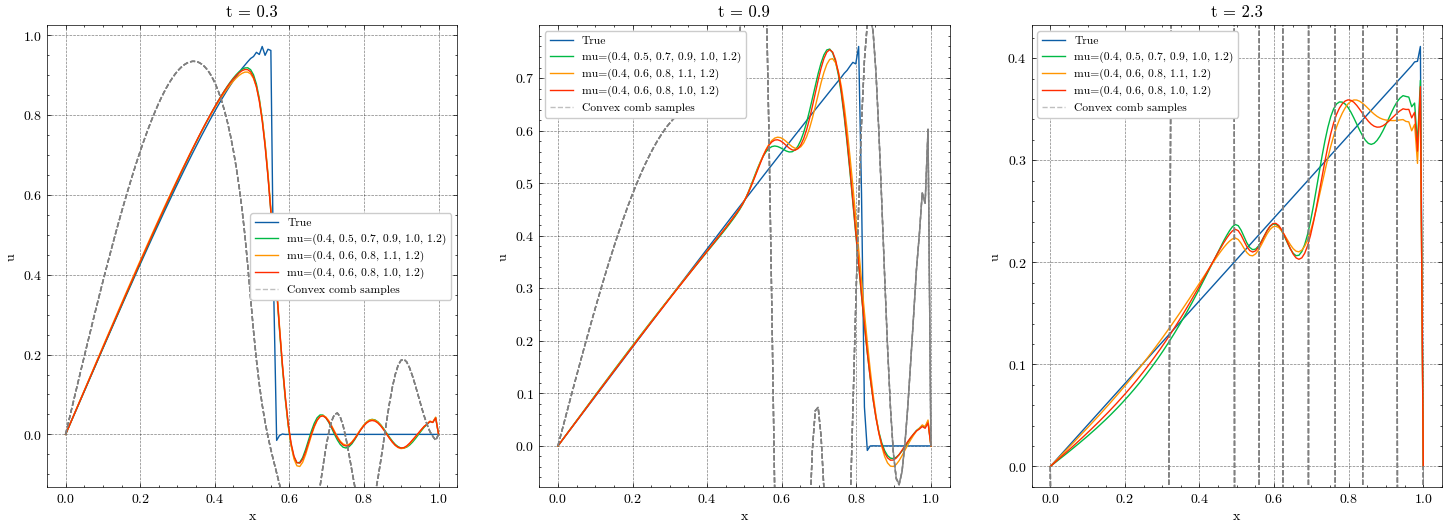

In [46]:
# plot the response of the convex combination samples
times = [0.3, 0.9, 2.3]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, s_rec_full_lst_convex_comb[0].shape[0])
    
    ax.plot(x_values, X_all_test.T[:, t_index], label="True", linestyle='-', alpha=1)
    
    # plot the responses of the selected models
    for j in representatives:
        ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], label=names[j], linestyle='-', alpha=1)

    
    # for j in range(len(s_rec_full_lst_convex_comb)):
    #     ax.plot(x_values, s_rec_full_lst_convex_comb[j][:, t_index], linestyle='--', alpha=0.5, color='grey', linewidth=2)
    
    sample_lines = LineCollection([np.column_stack((x_values, s_rec_full_lst_convex_comb[j][:, t_index])) for j in range(len(s_rec_full_lst_convex_comb))], colors='grey', linestyles='--', alpha=0.5, label='Convex comb samples')
    ax.add_collection(sample_lines)
    
    ax.legend(loc="best", fontsize='small')
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    # ax.legend(loc="upper left")

In [36]:
operators_lst_sel = [operators_lst[i] for i in anomalous_idx_svm]
X_list_sel = [X_list[i] for i in anomalous_idx_svm]
Xi_lst_sel = [Xi_lst[i] for i in anomalous_idx_svm]

In [37]:
import tqdm

N_samples = 1000
abs_error_full_lst = []
relative_error_testing_window_lst = []
relative_error_training_window_lst = []
s_rec_full_lst = []

mu_test = 0.98

for i in tqdm.tqdm(range(N_samples)):
    # # randomly choose 1 from stiefel_samples_Vr and 1 from stiefel_samples_Vbar
    # idx_Vr = np.random.randint(0, N_stiefel_samples)
    # idx_Vbar = np.random.randint(0, N_stiefel_samples)
    
    # print(i)
    
    X = X_list_sel[maxI[i]]
    X_ref = np.mean(X, axis=1)[:, None]
    
    Vr_sample = stiefel_samples_Vr[i]
    Vbar_sample = stiefel_samples_Vbar[i]
    
    operators = operators_lst_sel[maxI[i]]

    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr_sample.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    

    modelform = config['params']['modelform']
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
                
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    # Xi = Xi_lst[-1] # the nominal Xi
    Xi = Xi_lst_sel[maxI[i]]
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr_sample @ s_hat_full + Vbar_sample @ Xi @ poly_full
    
    try:
        abs_error_full = np.abs(X_all_test.T - s_rec_full)
        relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
        relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
        
        abs_error_full_lst.append(abs_error_full)
        relative_error_testing_window_lst.append(relative_error_testing_window)
        relative_error_training_window_lst.append(relative_error_training_window)
        s_rec_full_lst.append(s_rec_full)
        
    except Exception as e:
        print(e)
        print("Error in iteration: ", i)
        continue    

100%|██████████| 1000/1000 [00:20<00:00, 49.96it/s]


In [38]:
# mean relative error across the testing window
mean_relative_error_testing = np.mean(relative_error_testing_window_lst)
std_relative_error_testing = np.std(relative_error_testing_window_lst)
# coeff_var = std_relative_error_testing / mean_relative_error_testing
print(f"Mean relative error: {mean_relative_error_testing:.4%}")
print(f"Std relative error: {std_relative_error_testing:.4%}")
# print(f"Coefficient of variation: {coeff_var:.4%}")

Mean relative error: 56.3143%
Std relative error: 31.5884%


In [39]:
# coefficient of variation of s_rec_full
# coeff_var_s_rec_full = np.std(s_rec_full_lst, axis=0) / (np.mean(s_rec_full_lst, axis=0))
std_s_rec_full = np.std(s_rec_full_lst, axis=0)
std_s_rec_full_testing = std_s_rec_full[T_end_index:]
std_s_rec_full_training = std_s_rec_full[:T_end_index]

In [40]:
#  mean reconstruction
mean_s_rec_full = np.mean(s_rec_full_lst, axis=0)
mean_s_rec_full_testing = mean_s_rec_full[T_end_index:]
mean_s_rec_full_training = mean_s_rec_full[:T_end_index]

In [41]:
# calculate 95% confidence interval
confidence_interval = 1.96 * std_s_rec_full

X =  (8000, 130)
Y =  (8000, 130)
s_ref_all[i] =  (0, 8000)


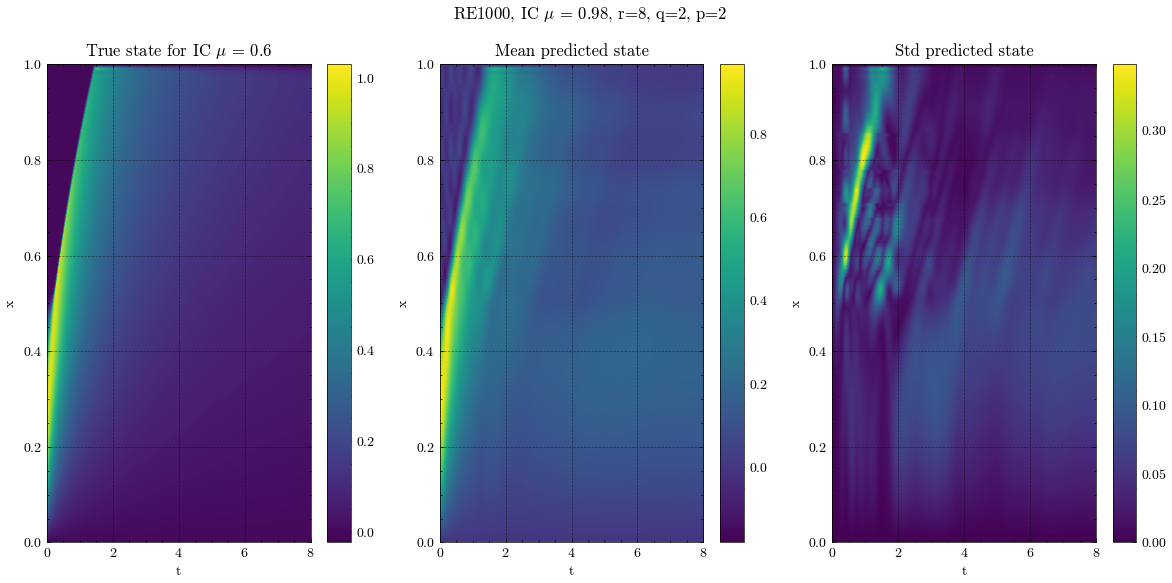

In [42]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(1):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(mean_s_rec_full.shape[0])), np.linspace(0.0, 1.0, mean_s_rec_full.shape[1]))
    print("X = ", XX.shape)
    print("Y = ", YY.shape)
    print("s_ref_all[i] = ", mean_s_rec_full_testing.shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    
    c0 = axs[0].imshow(X_all_test.T, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c0, ax=axs[0], orientation='vertical')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'True state for IC $\mu$ = {mus[2]}')
    
    c1 = axs[1].imshow(mean_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c1, ax=axs[1], orientation='vertical')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Mean predicted state')
    
    c2 = axs[2].imshow(std_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    # c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    fig.colorbar(c2, ax=axs[2], orientation='vertical')
    axs[2].set_xlabel('t')
    axs[2].set_ylabel('x')
    axs[2].set_title(f'Std predicted state')
    
    
    # fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    # fig.colorbar(c2, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.suptitle(f"RE1000, IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
    plt.tight_layout()
    plt.show()

In [43]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.cm import ScalarMappable
# from matplotlib.colors import Normalize


# # plot 95% confidence interval of the solution
# fig = plt.figure(figsize=(6, 6))
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)
# upper_bound = mean_s_rec_full + confidence_interval
# lower_bound = mean_s_rec_full - confidence_interval

# XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(s_rec_full_nominal.T.shape[0])), np.linspace(0.0, 1.0, s_rec_full_nominal.T.shape[1]))

# # surf = ax.plot_surface(XX, YY, s_rec_full_nominal, cmap='viridis', alpha=0.7)

# contour = ax.imshow(s_rec_full_nominal, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
# cbar = fig.colorbar(ScalarMappable(norm=Normalize(vmin=np.min(s_rec_full_nominal.T), vmax=np.max(s_rec_full_nominal.T)), cmap='viridis'), ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
# cbar.set_label('u, Velocity')


# # draw vertical plane at t=0.125, 0.375, 1,75
# times = [0.3, 0.9, 2.3]
# for t in times:
#     ax.plot([t, t], [0, 1], [0, 0], color='red', linestyle='--')


# ax.set_xlabel('t')
# ax.set_ylabel('x')
# # ax.set_zlabel('u')
# ax.set_title(f'RE1000, nominal model solution for IC $\mu$ = {mus[2]}, r={r}, q={q_trunc}, p={p}')


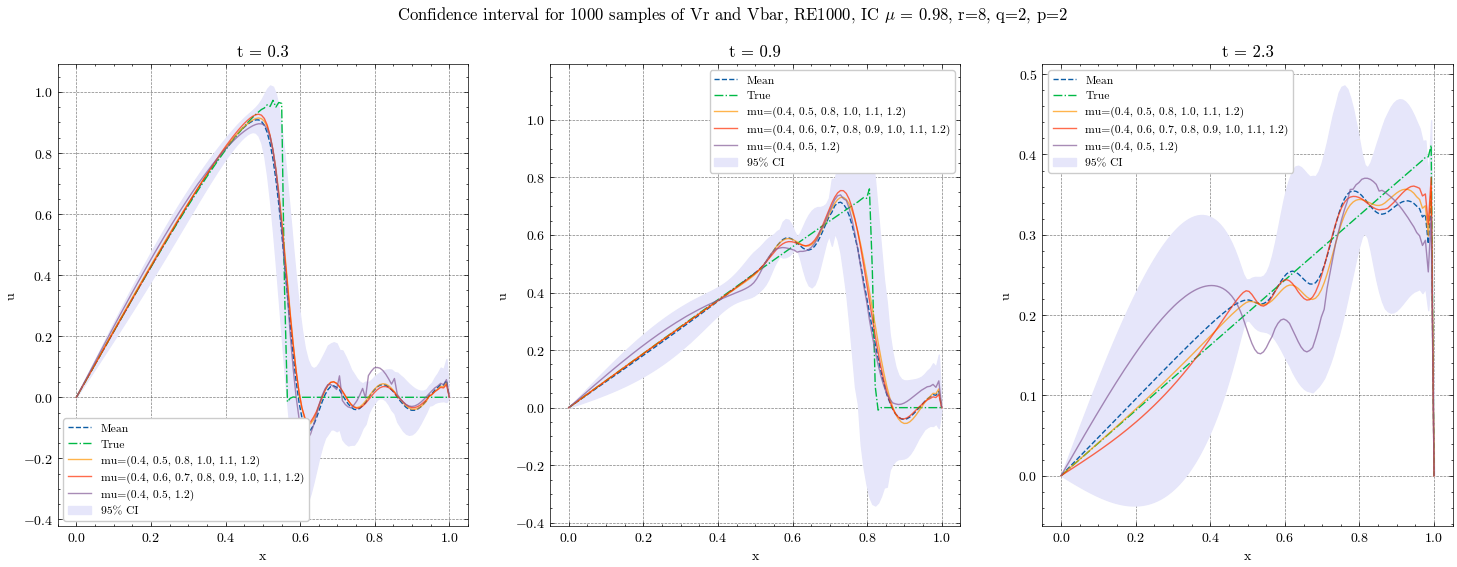

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

upper_bound = mean_s_rec_full + confidence_interval
lower_bound = mean_s_rec_full - confidence_interval

s_rec_full_lst_operators_sel = [s_rec_full_lst_operators[i] for i in anomalous_idx_svm]

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, mean_s_rec_full.shape[0])
    mean_line = mean_s_rec_full[:, t_index]
    # nominal_line = s_rec_full_nominal[:, t_index]
    true_line = X_all_test.T[:, t_index]
    lower_line = lower_bound[:, t_index]
    upper_line = upper_bound[:, t_index]
    
    model_lines = [s_rec_full_lst_operators_sel[j][:, t_index] for j in range(len(s_rec_full_lst_operators_sel))]
    
    ax.plot(x_values, mean_line, label='Mean', linestyle="--")
    ax.plot(x_values, true_line, label='True', linestyle="-.")
    for j in range(len(s_rec_full_lst_operators_sel)):
        ax.plot(x_values, model_lines[j], label=names_sel[j], linestyle="-", alpha=0.7)
    # ax.plot(x_values, nominal_line, label='Nominal', linestyle=":")
    ax.fill_between(x_values, lower_line, upper_line, alpha=1, label='95% CI', color='lavender')
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="best", fontsize='small')

    # # Create an inset axis
    # axins = inset_axes(ax, width="25%", height="25%", loc='center right')

    # # Plot the same data on the inset
    # axins.plot(x_values, mean_line, linestyle="--")
    # axins.plot(x_values, true_line, linestyle="-.")
    # axins.plot(x_values, nominal_line, linestyle=":")
    
    # if np.allclose(lower_line, upper_line):
    #     print("Lower and upper bounds are the same")
    #     axins.plot(x_values, lower_line, color='lavender')
    # else:
    #     print("Lower and upper bounds are different")
    #     axins.fill_between(x_values, lower_line, upper_line, color='lavender', alpha=1)

    # # Zoom-in range for the x-axis
    # focus_x_min, focus_x_max = 0.8, 0.81
    # axins.set_xlim(focus_x_min, focus_x_max)
    # axins.set_ylim(np.min(lower_line), np.max(upper_line))

    # # Dynamically determine the y-range based on the focus area
    # mask = (x_values >= focus_x_min) & (x_values <= focus_x_max)
    # focus_y_min = min(np.min(lower_line[mask]), np.min(mean_line[mask]))
    # focus_y_max = max(np.max(upper_line[mask]), np.max(mean_line[mask]))
    # y_margin = (focus_y_max - focus_y_min) * 0.1  # Adjust margin
    # axins.set_ylim(focus_y_min - y_margin, focus_y_max + y_margin)

    # # Optionally remove tick labels to declutter
    # axins.xaxis.set_tick_params(labelbottom=True)
    # axins.yaxis.set_tick_params(labelleft=True)

# plt.tight_layout()
plt.suptitle(f"Confidence interval for 1000 samples of Vr and Vbar, RE1000, IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
plt.show()
